# Figure 2b

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

import phate
import matplotlib
import proplot as pplt
import matplotlib.colors as mcolors
import scprep
import scipy
import seaborn
from scipy.stats.stats import pearsonr
from sklearn.decomposition import PCA

pd. set_option('display.max_columns', 60)
pd. set_option('display.max_rows', 100) 

/var/folders/x8/f_wldy753hb72b1q_11gzz840000gn/T/ipykernel_94615/3170988160.py:13: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


In [ ]:
data_no_meta = pd.read_csv('/....../Fig2_df_no_meta.txt', sep='\t')
data_no_meta.head()

,pHH3,RFP,Anti-mCherry,Vimentin,B7C23,EpCAM,B7C18,PanCK,GFP,Barcode_122,Barcode_123,Barcode_124,Barcode_125,Barcode_126,IdU,Barcode_128,Barcode_130,EQ_beads,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,DNA_1,DNA_2,194_Cisplatin,Barcode_196,Barcode_198,NKp44
0,0.000000,0.000000,0.000000,34.707291,0.000000,0.000000,0.000000,0.000000,0.000000,12.101083,1092.821533,14.944128,894.513306,26.129934,0.000000,821.910034,632.645142,8.135826,0.000000,21.658829,472.923370,23.141352,8.601446,22.103407,31.870472,47.424408,0.018484,12.103301,7.392933,11.060347,24.470173,35.526260,1161.258667,30.991314,0.000000,12.368027,16.073236,53.671825,0.000000,6.008776,22.241764,240.674149,87.260948,5.924499,3.945853,0.000000,5.440267,35.751488,8.804577,4.400812,29.169230,5.635969,7.820054,21.629023,1312.878662,2357.001709,26.925114,1.419293,6.208262,0.000000
1,0.000000,0.954360,0.000000,14.157574,0.000000,0.000000,0.000000,0.673772,0.000000,0.000000,681.312622,2.301330,570.860474,31.333672,0.000000,578.504150,365.343567,0.000000,0.000000,13.882650,296.851440,16.756283,12.612571,3.255828,12.925344,26.254704,0.000000,23.200035,0.000000,13.703773,1.997243,24.343845,792.608154,9.255106,0.000000,7.052355,6.512354,27.114666,0.000000,0.110017,2.845665,224.595200,59.615730,11.540479,19.132288,0.000000,7.207807,6.978939,0.000000,0.000000,18.350615,0.000000,5.480089,6.748727,1231.112061,2279.706543,23.626669,9.158621,0.597853,0.000000
2,0.000000,0.000000,0.000000,462.014740,1.668110,0.435236,0.000000,5.525582,1.507814,0.000000,53.992790,0.000000,10.743331,0.000000,3.138901,40.529613,26.669155,0.000000,0.000000,11.260657,101.655289,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.334311,0.000000,0.000000,1.588589,4.981578,216.276596,2.870738,0.000000,0.000000,10.847421,5.684055,0.000000,5.039053,12.555069,141.495621,20.588900,0.000000,0.000000,0.000000,0.271760,13.388305,6.980832,0.000000,26.652905,2.816440,6.579736,8.827875,1097.664551,2182.333496,48.120041,0.000000,2.993177,2.147535
3,0.000000,0.018068,3.134297,22.172516,1.283391,0.000000,0.000000,0.000000,0.812709,6.027076,384.966644,0.000000,387.498199,27.100786,0.438123,312.738068,205.129852,0.000000,0.000000,18.864975,200.602661,7.845024,5.418871,23.692860,7.627847,17.806017,3.561880,20.336231,0.000000,9.560737,5.191366,0.000000,637.622314,6.697829,0.000000,34.707542,3.337770,4.039658,0.000000,0.000000,12.394520,162.817825,18.507847,0.000000,0.000000,0.000000,11.461474,18.406147,0.000000,4.399421,18.399115,0.000000,8.413734,3.453521,827.154724,1403.302490,2.528028,1.957519,2.210782,4.314132
4,0.000000,0.000000,0.000000,23.359049,0.000000,0.000000,0.000000,0.000000,0.000000,4.315299,285.114105,0.000000,223.314011,0.000000,0.000000,204.531235,135.134155,0.000000,0.251297,2.745977,81.909645,0.000000,0.000000,0.000000,8.400867,10.778749,3.622564,20.252939,0.000000,1.076861,68.665955,21.521221,294.875244,13.426810,0.000000,3.656691,4.978725,16.354219,0.000000,0.000000,1.353185,109.419586,10.813177,0.000000,6.957262,0.000000,0.000000,4.159170,0.000000,12.133100,10.652521,0.000000,0.000000,1.877119,560.655090,1051.891113,0.000000,0.000000,0.000000,0.183443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297888,6.110509,0.000000,7.176610,337.942413,9.697246,8.511100,4.179708,0.000000,0.000000,3.313181,1.754135,2.943764,0.000000,4.690167,3.597665,1725.332153,1427.886475,1.887018,0.000000,258.175598,593.510437,30.123459,1.551396,6.652018,6.988986,24.275591,3.213357,374.739105,9.383837,65.897659,6.027968,8.122398,1569.713257,13.783870,0.000000,13.625187,78.920563,29.744139,10.179651,115.239334,22.561110,319.210693,34.657494,14.31

In [ ]:
data_meta = pd.read_csv('/....../Fig2_df_meta.txt', sep='\t')
data_meta.head()

/Users/callumnattress/opt/anaconda3/envs/phate_trellis/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3460: DtypeWarning: Columns (1,3,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
data_no_meta=data_no_meta.drop([

 'Barcode_122',
 'Barcode_123',
 'Barcode_124',
 'Barcode_125',
 'Barcode_126',
 'Barcode_128',
    'Barcode_130',
    'EQ_beads',
    'DNA_1',
    'DNA_2',
    '194_Cisplatin',
    'Barcode_196',
    'Barcode_198'
   
    
],axis=1, inplace=False)

In [8]:
data_no_meta

,pHH3,RFP,Anti-mCherry,Vimentin,B7C23,EpCAM,B7C18,PanCK,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44
0,0.000000,0.000000,0.000000,34.707291,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.658829,472.923370,23.141352,8.601446,22.103407,31.870472,47.424408,0.018484,12.103301,7.392933,11.060347,24.470173,35.526260,1161.258667,30.991314,0.000000,12.368027,16.073236,53.671825,0.000000,6.008776,22.241764,240.674149,87.260948,5.924499,3.945853,0.000000,5.440267,35.751488,8.804577,4.400812,29.169230,5.635969,7.820054,21.629023,0.000000
1,0.000000,0.954360,0.000000,14.157574,0.000000,0.000000,0.000000,0.673772,0.000000,0.000000,0.000000,13.882650,296.851440,16.756283,12.612571,3.255828,12.925344,26.254704,0.000000,23.200035,0.000000,13.703773,1.997243,24.343845,792.608154,9.255106,0.000000,7.052355,6.512354,27.114666,0.000000,0.110017,2.845665,224.595200,59.615730,11.540479,19.132288,0.000000,7.207807,6.978939,0.000000,0.000000,18.350615,0.000000,5.480089,6.748727,0.000000
2,0.000000,0.000000,0.000000,462.014740,1.668110,0.435236,0.000000,5.525582,1.507814,3.138901,0.000000,11.260657,101.655289,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.334311,0.000000,0.000000,1.588589,4.981578,216.276596,2.870738,0.000000,0.000000,10.847421,5.684055,0.000000,5.039053,12.555069,141.495621,20.588900,0.000000,0.000000,0.000000,0.271760,13.388305,6.980832,0.000000,26.652905,2.816440,6.579736,8.827875,2.147535
3,0.000000,0.018068,3.134297,22.172516,1.283391,0.000000,0.000000,0.000000,0.812709,0.438123,0.000000,18.864975,200.602661,7.845024,5.418871,23.692860,7.627847,17.806017,3.561880,20.336231,0.000000,9.560737,5.191366,0.000000,637.622314,6.697829,0.000000,34.707542,3.337770,4.039658,0.000000,0.000000,12.394520,162.817825,18.507847,0.000000,0.000000,0.000000,11.461474,18.406147,0.000000,4.399421,18.399115,0.000000,8.413734,3.453521,4.314132
4,0.000000,0.000000,0.000000,23.359049,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.251297,2.745977,81.909645,0.000000,0.000000,0.000000,8.400867,10.778749,3.622564,20.252939,0.000000,1.076861,68.665955,21.521221,294.875244,13.426810,0.000000,3.656691,4.978725,16.354219,0.000000,0.000000,1.353185,109.419586,10.813177,0.000000,6.957262,0.000000,0.000000,4.159170,0.000000,12.133100,10.652521,0.000000,0.000000,1.877119,0.183443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297888,6.110509,0.000000,7.176610,337.942413,9.697246,8.511100,4.179708,0.000000,0.000000,3.597665,0.000000,258.175598,593.510437,30.123459,1.551396,6.652018,6.988986,24.275591,3.213357,374.739105,9.383837,65.897659,6.027968,8.122398,1569.713257,13.783870,0.000000,13.625187,78.920563,29.744139,10.179651,115.239334,22.561110,319.210693,34.657494,14.315929,4.959088,3.304560,5.663685,70.374794,26.540962,4.759693,136.567215,237.200912,8.051436,19.825460,0.524880
1297889,0.000000,5.803782,0.000000,231.245010,6.954763,0.000000,5.616297,0.735243,2.060514,1.208458,0.000000,159.980637,441.057953,21.772139,4.733923,4.415124,6.373873,10.973018,0.000000,140.029800,4.911648,12.987065,4.537113,0.000000,1279.859253,9.139114,6.655334,6.359621,49.949875,19.015413,1.644014,13.307101,12.538220,234.196289,15.253603,4.100853,2.419853,2.599656,0.000000,54.279873,16.510887,1.401264,29.521624,109.622894,7.352564,2.300164,0.000000
1297890,0.000000,0.000000,0.000000,195.689468,7.493697,15.350165,1.876111,0.000000,2.219835,0.960146,3.148406,203.434692,187.350677,10.146773,2.304630,2.783955,5.186807,7.828005,0.061153,128.103378,16.893854,22.903173,1.336661,3.601358,1282.260376,9.974762,9.900576,18.289616,93.886551,43.484505,0.000000,18.924513,13.213944,352.032135,12.285683,5.028862,5.481525

In [15]:
as_data = np.arcsinh(data_no_meta/5)
as_data

,pHH3,RFP,Anti-mCherry,Vimentin,B7C23,EpCAM,B7C18,PanCK,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44
0,0.000000,0.000000,0.000000,2.635808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.172187,5.242671,2.236802,1.311062,2.191995,2.551486,2.945614,0.003697,1.617355,1.182826,1.534643,2.291442,2.658897,6.140974,2.523861,0.000000,1.637384,1.884223,3.068760,0.000000,1.017096,2.198082,4.567261,3.553432,1.006270,0.724190,0.000000,0.942287,2.665155,1.331301,0.794049,2.464090,0.968516,1.229753,2.170845,0.000000
1,0.000000,0.189732,0.000000,1.763776,0.000000,0.000000,0.000000,0.134350,0.000000,0.000000,0.000000,1.745306,4.777012,1.924034,1.655560,0.612201,1.678370,2.360501,0.000000,2.239278,0.000000,1.733113,0.389523,2.286372,5.759048,1.374954,0.000000,1.144053,1.079957,2.392179,0.000000,0.022002,0.542177,4.498133,3.173383,1.573502,2.051740,0.000000,1.161904,1.135531,0.000000,0.000000,2.011436,0.000000,0.947666,1.108421,0.000000
2,0.000000,0.000000,0.000000,5.219335,0.327724,0.086938,0.000000,0.953784,0.297170,0.592500,0.000000,1.551023,3.705901,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.058084,0.000000,0.000000,0.312602,0.878766,4.460401,0.546531,0.000000,0.000000,1.516960,0.974883,0.000000,0.886886,1.651314,4.036290,2.122890,0.000000,0.000000,0.000000,0.054325,1.711265,1.135752,0.000000,2.375292,0.537091,1.088137,1.333599,0.417291
3,0.000000,0.003614,0.591720,2.195040,0.253940,0.000000,0.000000,0.000000,0.161834,0.087513,0.000000,2.038133,4.385191,1.232441,0.939388,2.259835,1.208863,1.982400,0.662776,2.110894,0.000000,1.403642,0.908180,0.000000,5.541471,1.102346,0.000000,2.635815,0.625883,0.738850,0.000000,0.000000,1.639368,4.176577,2.019670,0.000000,0.000000,0.000000,1.567202,2.014352,0.000000,0.793840,2.013983,0.000000,1.292040,0.645034,0.780979
4,0.000000,0.000000,0.000000,2.245956,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050238,0.524775,3.490256,0.000000,0.000000,0.000000,1.290724,1.511196,0.672633,2.106909,0.000000,0.213741,3.314286,2.165978,4.770334,1.713956,0.000000,0.678151,0.878362,1.900784,0.000000,0.000000,0.267438,3.779421,1.514089,0.000000,1.133004,0.000000,0.000000,0.757334,0.000000,1.619628,1.500521,0.000000,0.000000,0.367121,0.036680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297888,1.030046,0.000000,1.158343,4.906639,1.416224,1.301945,0.760489,0.000000,0.000000,0.668595,0.000000,4.637443,5.469782,2.495831,0.305505,1.096853,1.136701,2.283621,0.605069,5.009984,1.387126,3.273248,1.019549,1.261887,6.442360,1.738590,0.000000,1.727712,3.453153,2.483332,1.459589,3.831191,2.211996,4.849622,2.634386,1.774271,0.875576,0.620351,0.972190,3.338804,2.371155,0.846978,4.000861,4.552728,1.254423,2.086211,0.104784
1297889,0.000000,0.990605,0.000000,4.527304,1.132712,0.000000,0.965903,0.146524,0.401249,0.239398,0.000000,4.159006,5.172918,2.177272,0.843240,0.796196,1.062977,1.527425,0.000000,4.025883,0.868823,1.682814,0.814374,0.000000,6.238218,1.363873,1.097252,1.061216,2.997225,2.045812,0.323149,1.705568,1.650066,4.539983,1.834365,0.748341,0.466829,0.498967,0.000000,3.079977,1.909905,0.276708,2.475928,3.781275,1.178295,0.445181,0.000000
1297890,0.000000,0.000000,0.000000,4.360401,1.194064,1.840363,0.366933,0.000000,0.430542,0.190868,0.594109,4.399205,4.316869,1.456687,0.445993,0.531422,0.907547,1.230610,0.012230,3.936927,1.931872,2.226692,0.264246,0.669195,6.240093,1.441376,1.434707,2.008224,3.626505,2.859403,0.000000,2.041179,1.698994,4.947482,1.631193,0.885449,0.947859,0.635176,1.009340,3.482979,1.906182,0.177857,2.919785,3.896287,1.899351,1.181658,0.195637
1297891,0.000000,0.000000,0.000000,4.802705,1.586264,0.000000,0.623947,1.743587,0.3

In [16]:
data_as_meta = pd.concat([as_data, data_meta], axis=1)
data_as_meta = data_as_meta.loc[(data_as_meta["Cell_type"] == 'gd')]

In [17]:
data_as_meta

,pHH3,RFP,Anti-mCherry,Vimentin,B7C23,EpCAM,B7C18,PanCK,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44,Date,PDO,Culture,Donor,Transduction,Treatment,Replicate,Time,Batch,Cell_type
0,0.000000,0.000000,0.000000,2.635808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.172187,5.242671,2.236802,1.311062,2.191995,2.551486,2.945614,0.003697,1.617355,1.182826,1.534643,2.291442,2.658897,6.140974,2.523861,0.0,1.637384,1.884223,3.068760,0.0,1.017096,2.198082,4.567261,3.553432,1.006270,0.724190,0.0,0.942287,2.665155,1.331301,0.794049,2.464090,0.968516,1.229753,2.170845,0.000000,20220614,27,gd,7,eGFP-stIL15,B7C18,A,48,1,gd
1,0.000000,0.189732,0.000000,1.763776,0.000000,0.000000,0.000000,0.134350,0.000000,0.000000,0.000000,1.745306,4.777012,1.924034,1.655560,0.612201,1.678370,2.360501,0.000000,2.239278,0.000000,1.733113,0.389523,2.286372,5.759048,1.374954,0.0,1.144053,1.079957,2.392179,0.0,0.022002,0.542177,4.498133,3.173383,1.573502,2.051740,0.0,1.161904,1.135531,0.000000,0.000000,2.011436,0.000000,0.947666,1.108421,0.000000,20220614,27,gd,7,eGFP-stIL15,B7C18,A,48,1,gd
2,0.000000,0.000000,0.000000,5.219335,0.327724,0.086938,0.000000,0.953784,0.297170,0.592500,0.000000,1.551023,3.705901,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.058084,0.000000,0.000000,0.312602,0.878766,4.460401,0.546531,0.0,0.000000,1.516960,0.974883,0.0,0.886886,1.651314,4.036290,2.122890,0.000000,0.000000,0.0,0.054325,1.711265,1.135752,0.000000,2.375292,0.537091,1.088137,1.333599,0.417291,20220614,27,gd,7,eGFP-stIL15,B7C18,A,48,1,gd
3,0.000000,0.003614,0.591720,2.195040,0.253940,0.000000,0.000000,0.000000,0.161834,0.087513,0.000000,2.038133,4.385191,1.232441,0.939388,2.259835,1.208863,1.982400,0.662776,2.110894,0.000000,1.403642,0.908180,0.000000,5.541471,1.102346,0.0,2.635815,0.625883,0.738850,0.0,0.000000,1.639368,4.176577,2.019670,0.000000,0.000000,0.0,1.567202,2.014352,0.000000,0.793840,2.013983,0.000000,1.292040,0.645034,0.780979,20220614,27,gd,7,eGFP-stIL15,B7C18,A,48,1,gd
4,0.000000,0.000000,0.000000,2.245956,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050238,0.524775,3.490256,0.000000,0.000000,0.000000,1.290724,1.511196,0.672633,2.106909,0.000000,0.213741,3.314286,2.165978,4.770334,1.713956,0.0,0.678151,0.878362,1.900784,0.0,0.000000,0.267438,3.779421,1.514089,0.000000,1.133004,0.0,0.000000,0.757334,0.000000,1.619628,1.500521,0.000000,0.000000,0.367121,0.036680,20220614,27,gd,7,eGFP-stIL15,B7C18,A,48,1,gd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284138,0.120747,0.000000,0.000000,1.726836,0.000000,0.000000,0.000000,0.701131,0.000000,0.000000,0.000000,1.212100,3.094021,0.000000,1.094072,1.693429,1.185940,0.809241,0.318914,1.659372,0.219540,0.000000,3.058195,0.000000,4.062861,1.025755,0.0,0.264430,0.059100,0.724401,0.0,1.695184,0.560924,3.327094,1.344709,0.000000,1.489398,0.0,0.300263,1.646955,0.126441,0.000000,1.044156,0.048836,0.910232,0.000000,0.000000,20220614,27,PDOgd,F,NT,BM,C,48,2,gd
1284139,0.000000,0.784939,0.741120,0.976925,0.599755,1.852972,0.717729,0.947632,0.535568,0.434492,0.119530,2.487009,4.365041,1.318201,0.000000,0.000000,1.904528,0.501814,0.000000,0.236786,0.923264,0.000000,1.280052,0.000000,5.143532,0.391007,0.0,0.289510,0.803807,1.632327,0.0,0.000000,1.051954,1.865091,1.926523,0.000000,0.000000,0.0,0.173858,2.285836,0.367934,0.080830,2.526831,1.802741,0.409312,0.960593,0.000000,20220614,27,PDOgd,F,NT,BM,C,48,2,gd
1284140,0.000000,0.000000,0.316462,1.065062,0.000000,0.130318,0.534876,1.210672,0.343678,0.000000,0.000000,0.673360,3.772372,0.166163,0.687322,0.918347,1.615945,1.636497,0.000000,1.847379,0.116024,0.000000

In [19]:
data_as_meta.index = np.arange (data_as_meta.shape[0])
data_as_meta['Date'] = data_as_meta['Date'].apply(str)
data_as_meta['Replicate'] = data_as_meta['Replicate'].apply(str)
data_as_meta['Time'] = data_as_meta['Time'].apply(str)
data_as_meta['Donor'] = data_as_meta['Donor'].apply(str)
data_as_meta['PDO'] = data_as_meta['PDO'].apply(str)
full_data = data_as_meta

In [20]:
full_data['Condition'] = full_data['Culture'] + '_' + full_data['Donor'] + '_' + full_data['Transduction'] + '_' + full_data['Treatment'] + '_' + full_data['Date'] + '_' + full_data['Replicate']
grouped = full_data.groupby(
    [
        "Condition"
    ]
, as_index=False).mean()

full_data.index = np.arange (full_data.shape[0])
condition_list = pd.unique(full_data['Condition'].tolist())
full_data

,pHH3,RFP,Anti-mCherry,Vimentin,B7C23,EpCAM,B7C18,PanCK,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44,Date,PDO,Culture,Donor,Transduction,Treatment,Replicate,Time,Batch,Cell_type,Condition
0,0.000000,0.000000,0.000000,2.635808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.172187,5.242671,2.236802,1.311062,2.191995,2.551486,2.945614,0.003697,1.617355,1.182826,1.534643,2.291442,2.658897,6.140974,2.523861,0.0,1.637384,1.884223,3.068760,0.0,1.017096,2.198082,4.567261,3.553432,1.006270,0.724190,0.0,0.942287,2.665155,1.331301,0.794049,2.464090,0.968516,1.229753,2.170845,0.000000,20220614,27,gd,7,eGFP-stIL15,B7C18,A,48,1,gd,gd_7_eGFP-stIL15_B7C18_20220614_A
1,0.000000,0.189732,0.000000,1.763776,0.000000,0.000000,0.000000,0.134350,0.000000,0.000000,0.000000,1.745306,4.777012,1.924034,1.655560,0.612201,1.678370,2.360501,0.000000,2.239278,0.000000,1.733113,0.389523,2.286372,5.759048,1.374954,0.0,1.144053,1.079957,2.392179,0.0,0.022002,0.542177,4.498133,3.173383,1.573502,2.051740,0.0,1.161904,1.135531,0.000000,0.000000,2.011436,0.000000,0.947666,1.108421,0.000000,20220614,27,gd,7,eGFP-stIL15,B7C18,A,48,1,gd,gd_7_eGFP-stIL15_B7C18_20220614_A
2,0.000000,0.000000,0.000000,5.219335,0.327724,0.086938,0.000000,0.953784,0.297170,0.592500,0.000000,1.551023,3.705901,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.058084,0.000000,0.000000,0.312602,0.878766,4.460401,0.546531,0.0,0.000000,1.516960,0.974883,0.0,0.886886,1.651314,4.036290,2.122890,0.000000,0.000000,0.0,0.054325,1.711265,1.135752,0.000000,2.375292,0.537091,1.088137,1.333599,0.417291,20220614,27,gd,7,eGFP-stIL15,B7C18,A,48,1,gd,gd_7_eGFP-stIL15_B7C18_20220614_A
3,0.000000,0.003614,0.591720,2.195040,0.253940,0.000000,0.000000,0.000000,0.161834,0.087513,0.000000,2.038133,4.385191,1.232441,0.939388,2.259835,1.208863,1.982400,0.662776,2.110894,0.000000,1.403642,0.908180,0.000000,5.541471,1.102346,0.0,2.635815,0.625883,0.738850,0.0,0.000000,1.639368,4.176577,2.019670,0.000000,0.000000,0.0,1.567202,2.014352,0.000000,0.793840,2.013983,0.000000,1.292040,0.645034,0.780979,20220614,27,gd,7,eGFP-stIL15,B7C18,A,48,1,gd,gd_7_eGFP-stIL15_B7C18_20220614_A
4,0.000000,0.000000,0.000000,2.245956,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050238,0.524775,3.490256,0.000000,0.000000,0.000000,1.290724,1.511196,0.672633,2.106909,0.000000,0.213741,3.314286,2.165978,4.770334,1.713956,0.0,0.678151,0.878362,1.900784,0.0,0.000000,0.267438,3.779421,1.514089,0.000000,1.133004,0.0,0.000000,0.757334,0.000000,1.619628,1.500521,0.000000,0.000000,0.367121,0.036680,20220614,27,gd,7,eGFP-stIL15,B7C18,A,48,1,gd,gd_7_eGFP-stIL15_B7C18_20220614_A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284138,0.120747,0.000000,0.000000,1.726836,0.000000,0.000000,0.000000,0.701131,0.000000,0.000000,0.000000,1.212100,3.094021,0.000000,1.094072,1.693429,1.185940,0.809241,0.318914,1.659372,0.219540,0.000000,3.058195,0.000000,4.062861,1.025755,0.0,0.264430,0.059100,0.724401,0.0,1.695184,0.560924,3.327094,1.344709,0.000000,1.489398,0.0,0.300263,1.646955,0.126441,0.000000,1.044156,0.048836,0.910232,0.000000,0.000000,20220614,27,PDOgd,F,NT,BM,C,48,2,gd,PDOgd_F_NT_BM_20220614_C
1284139,0.000000,0.784939,0.741120,0.976925,0.599755,1.852972,0.717729,0.947632,0.535568,0.434492,0.119530,2.487009,4.365041,1.318201,0.000000,0.000000,1.904528,0.501814,0.000000,0.236786,0.923264,0.000000,1.280052,0.000000,5.143532,0.391007,0.0,0.289510,0.803807,1.632327,0.0,0.000000,1.051954,1.865091,1.926523,0.000000,0.000000,0.0,0.173858,2.285836,0.367934,0.080830,2.526831,1.802741,0.409312,0.960593,0.000000,20220614,27,PDOgd,F,NT,BM,C,48,2

In [21]:
#Unmodified (NT) monoculture untreated (BM) control
full_data["Control"] =  "gd_" + full_data["Donor"] + "_NT_BM"



In [22]:
full_data.head()

,pHH3,RFP,Anti-mCherry,Vimentin,B7C23,EpCAM,B7C18,PanCK,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44,Date,PDO,Culture,Donor,Transduction,Treatment,Replicate,Time,Batch,Cell_type,Condition,Control
0,0.0,0.000000,0.00000,2.635808,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.172187,5.242671,2.236802,1.311062,2.191995,2.551486,2.945614,0.003697,1.617355,1.182826,1.534643,2.291442,2.658897,6.140974,2.523861,0.0,1.637384,1.884223,3.068760,0.0,1.017096,2.198082,4.567261,3.553432,1.006270,0.724190,0.0,0.942287,2.665155,1.331301,0.794049,2.464090,0.968516,1.229753,2.170845,0.000000,20220614,27,gd,7,eGFP-stIL15,B7C18,A,48,1,gd,gd_7_eGFP-stIL15_B7C18_20220614_A,gd_7_NT_BM
1,0.0,0.189732,0.00000,1.763776,0.000000,0.000000,0.0,0.134350,0.000000,0.000000,0.000000,1.745306,4.777012,1.924034,1.655560,0.612201,1.678370,2.360501,0.000000,2.239278,0.000000,1.733113,0.389523,2.286372,5.759048,1.374954,0.0,1.144053,1.079957,2.392179,0.0,0.022002,0.542177,4.498133,3.173383,1.573502,2.051740,0.0,1.161904,1.135531,0.000000,0.000000,2.011436,0.000000,0.947666,1.108421,0.000000,20220614,27,gd,7,eGFP-stIL15,B7C18,A,48,1,gd,gd_7_eGFP-stIL15_B7C18_20220614_A,gd_7_NT_BM
2,0.0,0.000000,0.00000,5.219335,0.327724,0.086938,0.0,0.953784,0.297170,0.592500,0.000000,1.551023,3.705901,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.058084,0.000000,0.000000,0.312602,0.878766,4.460401,0.546531,0.0,0.000000,1.516960,0.974883,0.0,0.886886,1.651314,4.036290,2.122890,0.000000,0.000000,0.0,0.054325,1.711265,1.135752,0.000000,2.375292,0.537091,1.088137,1.333599,0.417291,20220614,27,gd,7,eGFP-stIL15,B7C18,A,48,1,gd,gd_7_eGFP-stIL15_B7C18_20220614_A,gd_7_NT_BM
3,0.0,0.003614,0.59172,2.195040,0.253940,0.000000,0.0,0.000000,0.161834,0.087513,0.000000,2.038133,4.385191,1.232441,0.939388,2.259835,1.208863,1.982400,0.662776,2.110894,0.000000,1.403642,0.908180,0.000000,5.541471,1.102346,0.0,2.635815,0.625883,0.738850,0.0,0.000000,1.639368,4.176577,2.019670,0.000000,0.000000,0.0,1.567202,2.014352,0.000000,0.793840,2.013983,0.000000,1.292040,0.645034,0.780979,20220614,27,gd,7,eGFP-stIL15,B7C18,A,48,1,gd,gd_7_eGFP-stIL15_B7C18_20220614_A,gd_7_NT_BM
4,0.0,0.000000,0.00000,2.245956,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.050238,0.524775,3.490256,0.000000,0.000000,0.000000,1.290724,1.511196,0.672633,2.106909,0.000000,0.213741,3.314286,2.165978,4.770334,1.713956,0.0,0.678151,0.878362,1.900784,0.0,0.000000,0.267438,3.779421,1.514089,0.000000,1.133004,0.0,0.000000,0.757334,0.000000,1.619628,1.500521,0.000000,0.000000,0.367121,0.036680,20220614,27,gd,7,eGFP-stIL15,B7C18,A,48,1,gd,gd_7_eGFP-stIL15_B7C18_20220614_A,gd_7_NT_BM


In [23]:
no_metadata = full_data.drop(
['Date',
 'PDO',
 'Culture',
 'Donor',
 'Transduction',
 'Treatment',
 'Replicate',
 'Time',
 'Cell_type',
 'Batch',
 'Control',
'Condition',
], axis=1, inplace=False)
no_metadata.head()

,pHH3,RFP,Anti-mCherry,Vimentin,B7C23,EpCAM,B7C18,PanCK,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44
0,0.0,0.000000,0.00000,2.635808,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.172187,5.242671,2.236802,1.311062,2.191995,2.551486,2.945614,0.003697,1.617355,1.182826,1.534643,2.291442,2.658897,6.140974,2.523861,0.0,1.637384,1.884223,3.068760,0.0,1.017096,2.198082,4.567261,3.553432,1.006270,0.724190,0.0,0.942287,2.665155,1.331301,0.794049,2.464090,0.968516,1.229753,2.170845,0.000000
1,0.0,0.189732,0.00000,1.763776,0.000000,0.000000,0.0,0.134350,0.000000,0.000000,0.000000,1.745306,4.777012,1.924034,1.655560,0.612201,1.678370,2.360501,0.000000,2.239278,0.000000,1.733113,0.389523,2.286372,5.759048,1.374954,0.0,1.144053,1.079957,2.392179,0.0,0.022002,0.542177,4.498133,3.173383,1.573502,2.051740,0.0,1.161904,1.135531,0.000000,0.000000,2.011436,0.000000,0.947666,1.108421,0.000000
2,0.0,0.000000,0.00000,5.219335,0.327724,0.086938,0.0,0.953784,0.297170,0.592500,0.000000,1.551023,3.705901,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.058084,0.000000,0.000000,0.312602,0.878766,4.460401,0.546531,0.0,0.000000,1.516960,0.974883,0.0,0.886886,1.651314,4.036290,2.122890,0.000000,0.000000,0.0,0.054325,1.711265,1.135752,0.000000,2.375292,0.537091,1.088137,1.333599,0.417291
3,0.0,0.003614,0.59172,2.195040,0.253940,0.000000,0.0,0.000000,0.161834,0.087513,0.000000,2.038133,4.385191,1.232441,0.939388,2.259835,1.208863,1.982400,0.662776,2.110894,0.000000,1.403642,0.908180,0.000000,5.541471,1.102346,0.0,2.635815,0.625883,0.738850,0.0,0.000000,1.639368,4.176577,2.019670,0.000000,0.000000,0.0,1.567202,2.014352,0.000000,0.793840,2.013983,0.000000,1.292040,0.645034,0.780979
4,0.0,0.000000,0.00000,2.245956,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.050238,0.524775,3.490256,0.000000,0.000000,0.000000,1.290724,1.511196,0.672633,2.106909,0.000000,0.213741,3.314286,2.165978,4.770334,1.713956,0.0,0.678151,0.878362,1.900784,0.0,0.000000,0.267438,3.779421,1.514089,0.000000,1.133004,0.0,0.000000,0.757334,0.000000,1.619628,1.500521,0.000000,0.000000,0.367121,0.036680


In [24]:
marker_list = list(no_metadata.columns.values)

In [25]:
condition_list

array(['gd_7_eGFP-stIL15_B7C18_20220614_A',
       'gd_7_eGFP-stIL15_B7C18_20220614_B',
       'gd_7_eGFP-stIL15_B7C18_20220614_C',
       'gd_7_eGFP-stIL15_BM_20220614_A', 'gd_7_eGFP-stIL15_BM_20220614_B',
       'gd_7_eGFP-stIL15_BM_20220614_C', 'gd_7_NT_B7C18_20220614_A',
       'gd_7_NT_B7C18_20220614_B', 'gd_7_NT_B7C18_20220614_C',
       'gd_7_NT_BM_20220614_A', 'gd_7_NT_BM_20220614_B',
       'gd_7_NT_BM_20220614_C', 'gd_A_eGFP-stIL15_B7C18_20220614_A',
       'gd_A_eGFP-stIL15_B7C18_20220614_B',
       'gd_A_eGFP-stIL15_B7C18_20220614_C',
       'gd_A_eGFP-stIL15_BM_20220614_A', 'gd_A_eGFP-stIL15_BM_20220614_B',
       'gd_A_eGFP-stIL15_BM_20220614_C', 'gd_A_NT_B7C18_20220614_A',
       'gd_A_NT_B7C18_20220614_B', 'gd_A_NT_B7C18_20220614_C',
       'gd_A_NT_BM_20220614_A', 'gd_A_NT_BM_20220614_B',
       'gd_A_NT_BM_20220614_C', 'gd_B_eGFP-stIL15_B7C18_20220614_A',
       'gd_B_eGFP-stIL15_B7C18_20220614_B',
       'gd_B_eGFP-stIL15_B7C18_20220614_C',
       'gd_B_eGFP-stIL15_B

In [26]:
NT_BM_signed_emds = pd.DataFrame(
    np.full((len(condition_list), len(marker_list)), np.nan),
    columns=marker_list,
    index=condition_list)

control_list = pd.unique(full_data['Control'].tolist())

In [27]:
 for condition in condition_list:
    each_line = full_data.loc[(full_data["Condition"] == condition)]
    control_line = each_line['Control']
    print(control_line.values[0])
    control_df = full_data.loc[full_data["Condition"].str.startswith(control_line.values[0])]
#     print(condition,control_df["Control"].values[0])
    for marker in marker_list:
                    sign = np.sign(each_line[marker].median() - control_df[marker].median())
                    if sign == 0:
                        sign = np.sign(each_line[marker].mean() - control_df[marker].mean())
                    signed_emd = sign*scprep.stats.EMD(
                        each_line[marker], control_df[marker]
            )
                    NT_BM_signed_emds.loc[condition, marker] = signed_emd

assert not NT_BM_signed_emds.isna().values.any()
        
        

gd_7_NT_BM
gd_7_NT_BM
gd_7_NT_BM
gd_7_NT_BM
gd_7_NT_BM
gd_7_NT_BM
gd_7_NT_BM
gd_7_NT_BM
gd_7_NT_BM
gd_7_NT_BM
gd_7_NT_BM
gd_7_NT_BM
gd_A_NT_BM
gd_A_NT_BM
gd_A_NT_BM
gd_A_NT_BM
gd_A_NT_BM
gd_A_NT_BM
gd_A_NT_BM
gd_A_NT_BM
gd_A_NT_BM
gd_A_NT_BM
gd_A_NT_BM
gd_A_NT_BM
gd_B_NT_BM
gd_B_NT_BM
gd_B_NT_BM
gd_B_NT_BM
gd_B_NT_BM
gd_B_NT_BM
gd_B_NT_BM
gd_B_NT_BM
gd_B_NT_BM
gd_B_NT_BM
gd_B_NT_BM
gd_B_NT_BM
gd_C_NT_BM
gd_C_NT_BM
gd_C_NT_BM
gd_C_NT_BM
gd_C_NT_BM
gd_C_NT_BM
gd_C_NT_BM
gd_C_NT_BM
gd_C_NT_BM
gd_C_NT_BM
gd_C_NT_BM
gd_C_NT_BM
gd_D_NT_BM
gd_D_NT_BM
gd_D_NT_BM
gd_D_NT_BM
gd_D_NT_BM
gd_D_NT_BM
gd_D_NT_BM
gd_D_NT_BM
gd_D_NT_BM
gd_D_NT_BM
gd_D_NT_BM
gd_D_NT_BM
gd_E_NT_BM
gd_E_NT_BM
gd_E_NT_BM
gd_E_NT_BM
gd_E_NT_BM
gd_E_NT_BM
gd_E_NT_BM
gd_E_NT_BM
gd_E_NT_BM
gd_E_NT_BM
gd_E_NT_BM
gd_E_NT_BM
gd_F_NT_BM
gd_F_NT_BM
gd_F_NT_BM
gd_F_NT_BM
gd_F_NT_BM
gd_F_NT_BM
gd_F_NT_BM
gd_F_NT_BM
gd_F_NT_BM
gd_F_NT_BM
gd_F_NT_BM
gd_F_NT_BM
gd_7_NT_BM
gd_7_NT_BM
gd_7_NT_BM
gd_7_NT_BM
gd_7_NT_BM
gd_7_NT_BM
gd_7_NT_BM

In [28]:
NT_BM_signed_emds.head()

,pHH3,RFP,Anti-mCherry,Vimentin,B7C23,EpCAM,B7C18,PanCK,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44
gd_7_eGFP-stIL15_B7C18_20220614_A,0.077213,0.034413,0.033059,0.979701,0.122008,-0.024104,0.076449,0.047082,0.282376,1.234803,0.056642,-0.467586,1.163161,0.616684,0.731604,1.244977,0.391722,1.260138,0.179628,1.698083,0.317276,0.874023,1.047295,0.967822,1.016816,1.343547,0.337046,0.498731,0.727182,1.151336,0.140271,0.543395,0.910392,1.759896,0.820603,0.223470,0.955821,0.078822,0.771130,0.409491,0.575065,0.619500,0.654968,-0.735526,0.309324,1.298557,0.107901
gd_7_eGFP-stIL15_B7C18_20220614_B,0.073850,0.030763,0.029986,0.969661,0.121958,-0.019117,0.077736,0.035092,0.260184,1.190581,0.045763,-0.502632,1.199265,0.609081,0.704639,1.221676,0.341454,1.245494,0.147218,1.653445,0.303548,0.855421,0.974036,0.980464,1.013883,1.275549,0.329514,0.496276,0.746772,1.100109,0.134722,0.512244,0.913691,1.726308,0.778571,0.214789,0.892974,0.067176,0.705840,0.409898,0.569694,0.545717,0.609801,-0.750844,0.282152,1.223074,0.117341
gd_7_eGFP-stIL15_B7C18_20220614_C,0.062833,0.025339,0.031302,0.928294,0.111510,-0.017915,0.075768,0.032486,0.275007,1.131531,0.052829,-0.493685,1.213559,0.609168,0.772612,1.261461,0.367999,1.258072,0.198313,1.591080,0.300734,0.847647,0.999136,0.987483,1.027968,1.223246,0.329908,0.528783,0.777012,1.093412,0.142624,0.507401,0.900572,1.718483,0.801389,0.215659,0.897171,0.076590,0.768782,0.428535,0.597021,0.541631,0.607471,-0.745862,0.310606,1.191978,0.120153
gd_7_eGFP-stIL15_BM_20220614_A,0.073994,0.029436,0.028064,0.940570,0.107599,-0.020211,0.066489,0.032102,0.274118,1.277505,0.046920,-0.471601,1.214997,0.629944,0.740492,1.256843,0.380628,1.258524,0.163755,1.647382,0.320415,0.874223,0.952097,0.991875,1.013152,1.245136,0.322328,0.493428,0.766447,1.124537,0.142580,0.540926,0.925549,1.764718,0.826900,0.221114,0.903802,0.071988,0.714393,0.416199,0.581567,0.508086,0.644077,-0.732967,0.294972,1.240187,0.137660
gd_7_eGFP-stIL15_BM_20220614_B,0.079656,0.032616,0.033053,0.973753,0.125607,-0.023856,0.079096,0.051049,0.291963,1.351025,0.055122,-0.441576,1.218696,0.634808,0.782747,1.284030,0.405385,1.299886,0.170616,1.722074,0.336318,0.906735,1.026117,0.992328,1.047060,1.345498,0.357307,0.521276,0.765380,1.182601,0.152308,0.569680,0.945158,1.812899,0.849907,0.234223,0.949373,0.077947,0.777968,0.433302,0.606933,0.606864,0.684209,-0.718986,0.317876,1.319717,0.122744


In [30]:
emd_df = NT_BM_signed_emds.reset_index()
emd_df[['Culture', 'Donor', 'Transduction', 'Treatment','Date', 'Replicate']] = emd_df['index'].str.split('_', expand=True)
emd_df = emd_df.loc[(emd_df["Culture"] != 'Standard')]
emd_meta = emd_df.drop(['index'],axis=1, inplace=False)
emd_meta.set_index(['Culture','Donor','Transduction', 'Treatment','Date', 'Replicate'], inplace=True)
emd_meta.head()

pHH3       RFP  \
Culture Donor Transduction Treatment Date     Replicate                       
gd      7     eGFP-stIL15  B7C18     20220614 A          0.077213  0.034413   
                                              B          0.073850  0.030763   
                                              C          0.062833  0.025339   
                           BM        20220614 A          0.073994  0.029436   
                                              B          0.079656  0.032616   

                                                         Anti-mCherry  \
Culture Donor Transduction Treatment Date     Replicate                 
gd      7     eGFP-stIL15  B7C18     20220614 A              0.033059   
                                              B              0.029986   
                                              C              0.031302   
                           BM        20220614 A              0.028064   
                                              B              0.033053   

                                                         Vimentin     B7C23  \
Culture Donor Transduction Treatment Date     Replicate                       
gd      7     eGFP-stIL15  B7C18     20220614 A          0.979701  0.122008   
                                              B          0.969661  0.121958   
                                              C          0.928294  0.111510   
                           BM        20220614 A          0.940570  0.107599   
                                              B          0.973753  0.125607   

                                                            EpCAM     B7C18  \
Culture Donor Transduction Treatment Date     Replicate                       
gd      7     eGFP-stIL15  B7C18     20220614 A         -0.024104  0.076449   
                                              B         -0.019117  0.077736   
                                              C         -0.017915  0.075768   
                           BM        20220614 A         -0.020211  0.066489   
                                              B         -0.023856  0.079096   

                                                            PanCK       GFP  \
Culture Donor Transduction Treatment Date     Replicate                       
gd      7     eGFP-stIL15  B7C18     20220614 A          0.047082  0.282376   
                                              B          0.035092  0.260184   
                                              C          0.032486  0.275007   
                           BM        20220614 A          0.032102  0.274118   
                                              B          0.051049  0.291963   

                                                              IdU     Trail  \
Culture Donor Transduction Treatment Date     Replicate                       
gd      7     eGFP-stIL15  B7C18     20220614 A          1.234803  0.056642   
                                              B          1.190581  0.045763   
                                              C          1.131531  0.052829   
                           BM        20220614 A          1.277505  0.046920   
                                              B          1.351025  0.055122   

                                                         cCaspase3      CD45  \
Culture Donor Transduction Treatment Date     Replicate                        
gd      7     eGFP-stIL15  B7C18     20220614 A          -0.467586  1.163161   
                                              B          -0.502632  1.199265   
                                              C          -0.493685  1.213559   
                           BM        20220614 A          -0.471601  1.214997   
                                              B          -0.441576  1.218696   

                                                           pSTAT5  pZAP_Syk  \
Culture Donor Transduction Treatment Date     Replicate                       
gd      7     eGFP-stIL15  B7C18     20220614 A          0.6

In [31]:
data = emd_meta.drop([    

 'RFP',
 'Anti-mCherry',
 'B7C23',
 'EpCAM',
 'B7C18',
 'PanCK',
    ],axis=1, inplace=False)
data.head()

pHH3  Vimentin  \
Culture Donor Transduction Treatment Date     Replicate                       
gd      7     eGFP-stIL15  B7C18     20220614 A          0.077213  0.979701   
                                              B          0.073850  0.969661   
                                              C          0.062833  0.928294   
                           BM        20220614 A          0.073994  0.940570   
                                              B          0.079656  0.973753   

                                                              GFP       IdU  \
Culture Donor Transduction Treatment Date     Replicate                       
gd      7     eGFP-stIL15  B7C18     20220614 A          0.282376  1.234803   
                                              B          0.260184  1.190581   
                                              C          0.275007  1.131531   
                           BM        20220614 A          0.274118  1.277505   
                                              B          0.291963  1.351025   

                                                            Trail  cCaspase3  \
Culture Donor Transduction Treatment Date     Replicate                        
gd      7     eGFP-stIL15  B7C18     20220614 A          0.056642  -0.467586   
                                              B          0.045763  -0.502632   
                                              C          0.052829  -0.493685   
                           BM        20220614 A          0.046920  -0.471601   
                                              B          0.055122  -0.441576   

                                                             CD45    pSTAT5  \
Culture Donor Transduction Treatment Date     Replicate                       
gd      7     eGFP-stIL15  B7C18     20220614 A          1.163161  0.616684   
                                              B          1.199265  0.609081   
                                              C          1.213559  0.609168   
                           BM        20220614 A          1.214997  0.629944   
                                              B          1.218696  0.634808   

                                                         pZAP_Syk    pSLP76  \
Culture Donor Transduction Treatment Date     Replicate                       
gd      7     eGFP-stIL15  B7C18     20220614 A          0.731604  1.244977   
                                              B          0.704639  1.221676   
                                              C          0.772612  1.261461   
                           BM        20220614 A          0.740492  1.256843   
                                              B          0.782747  1.284030   

                                                             pBTK      pSRC  \
Culture Donor Transduction Treatment Date     Replicate                       
gd      7     eGFP-stIL15  B7C18     20220614 A          0.391722  1.260138   
                                              B          0.341454  1.245494   
                                              C          0.367999  1.258072   
                           BM        20220614 A          0.380628  1.258524   
                                              B          0.405385  1.299886   

                                                             PDL1       pRB  \
Culture Donor Transduction Treatment Date     Replicate                       
gd      7     eGFP-stIL15  B7C18     20220614 A          0.179628  1.698083   
                                              B          0.147218  1.653445   
                                              C          0.198313  1.591080   
                           BM        20220614 A          0.163755  1.647382   
                                              B          0.170616  1.722074   

                                                           pNDRG1      pAKT  \
Culture Donor Transduction Treatment Date     Replicate                       
gd      7     eGFP

In [33]:
phate_op = phate.PHATE(knn=15,t=5, random_state=13, mds_solver="smacof", verbose=True)

data_phate = phate_op.fit_transform(data)
data_phate = pd.DataFrame(data_phate, index=data.index)

Calculating PHATE...
  Running PHATE on 168 observations and 41 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculating affinities...
  Calculating diffusion potential...
  Calculated diffusion potential in 0.03 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 0.03 seconds.
Calculated PHATE in 0.07 seconds.


/Users/callumnattress/opt/anaconda3/envs/phate_trellis/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


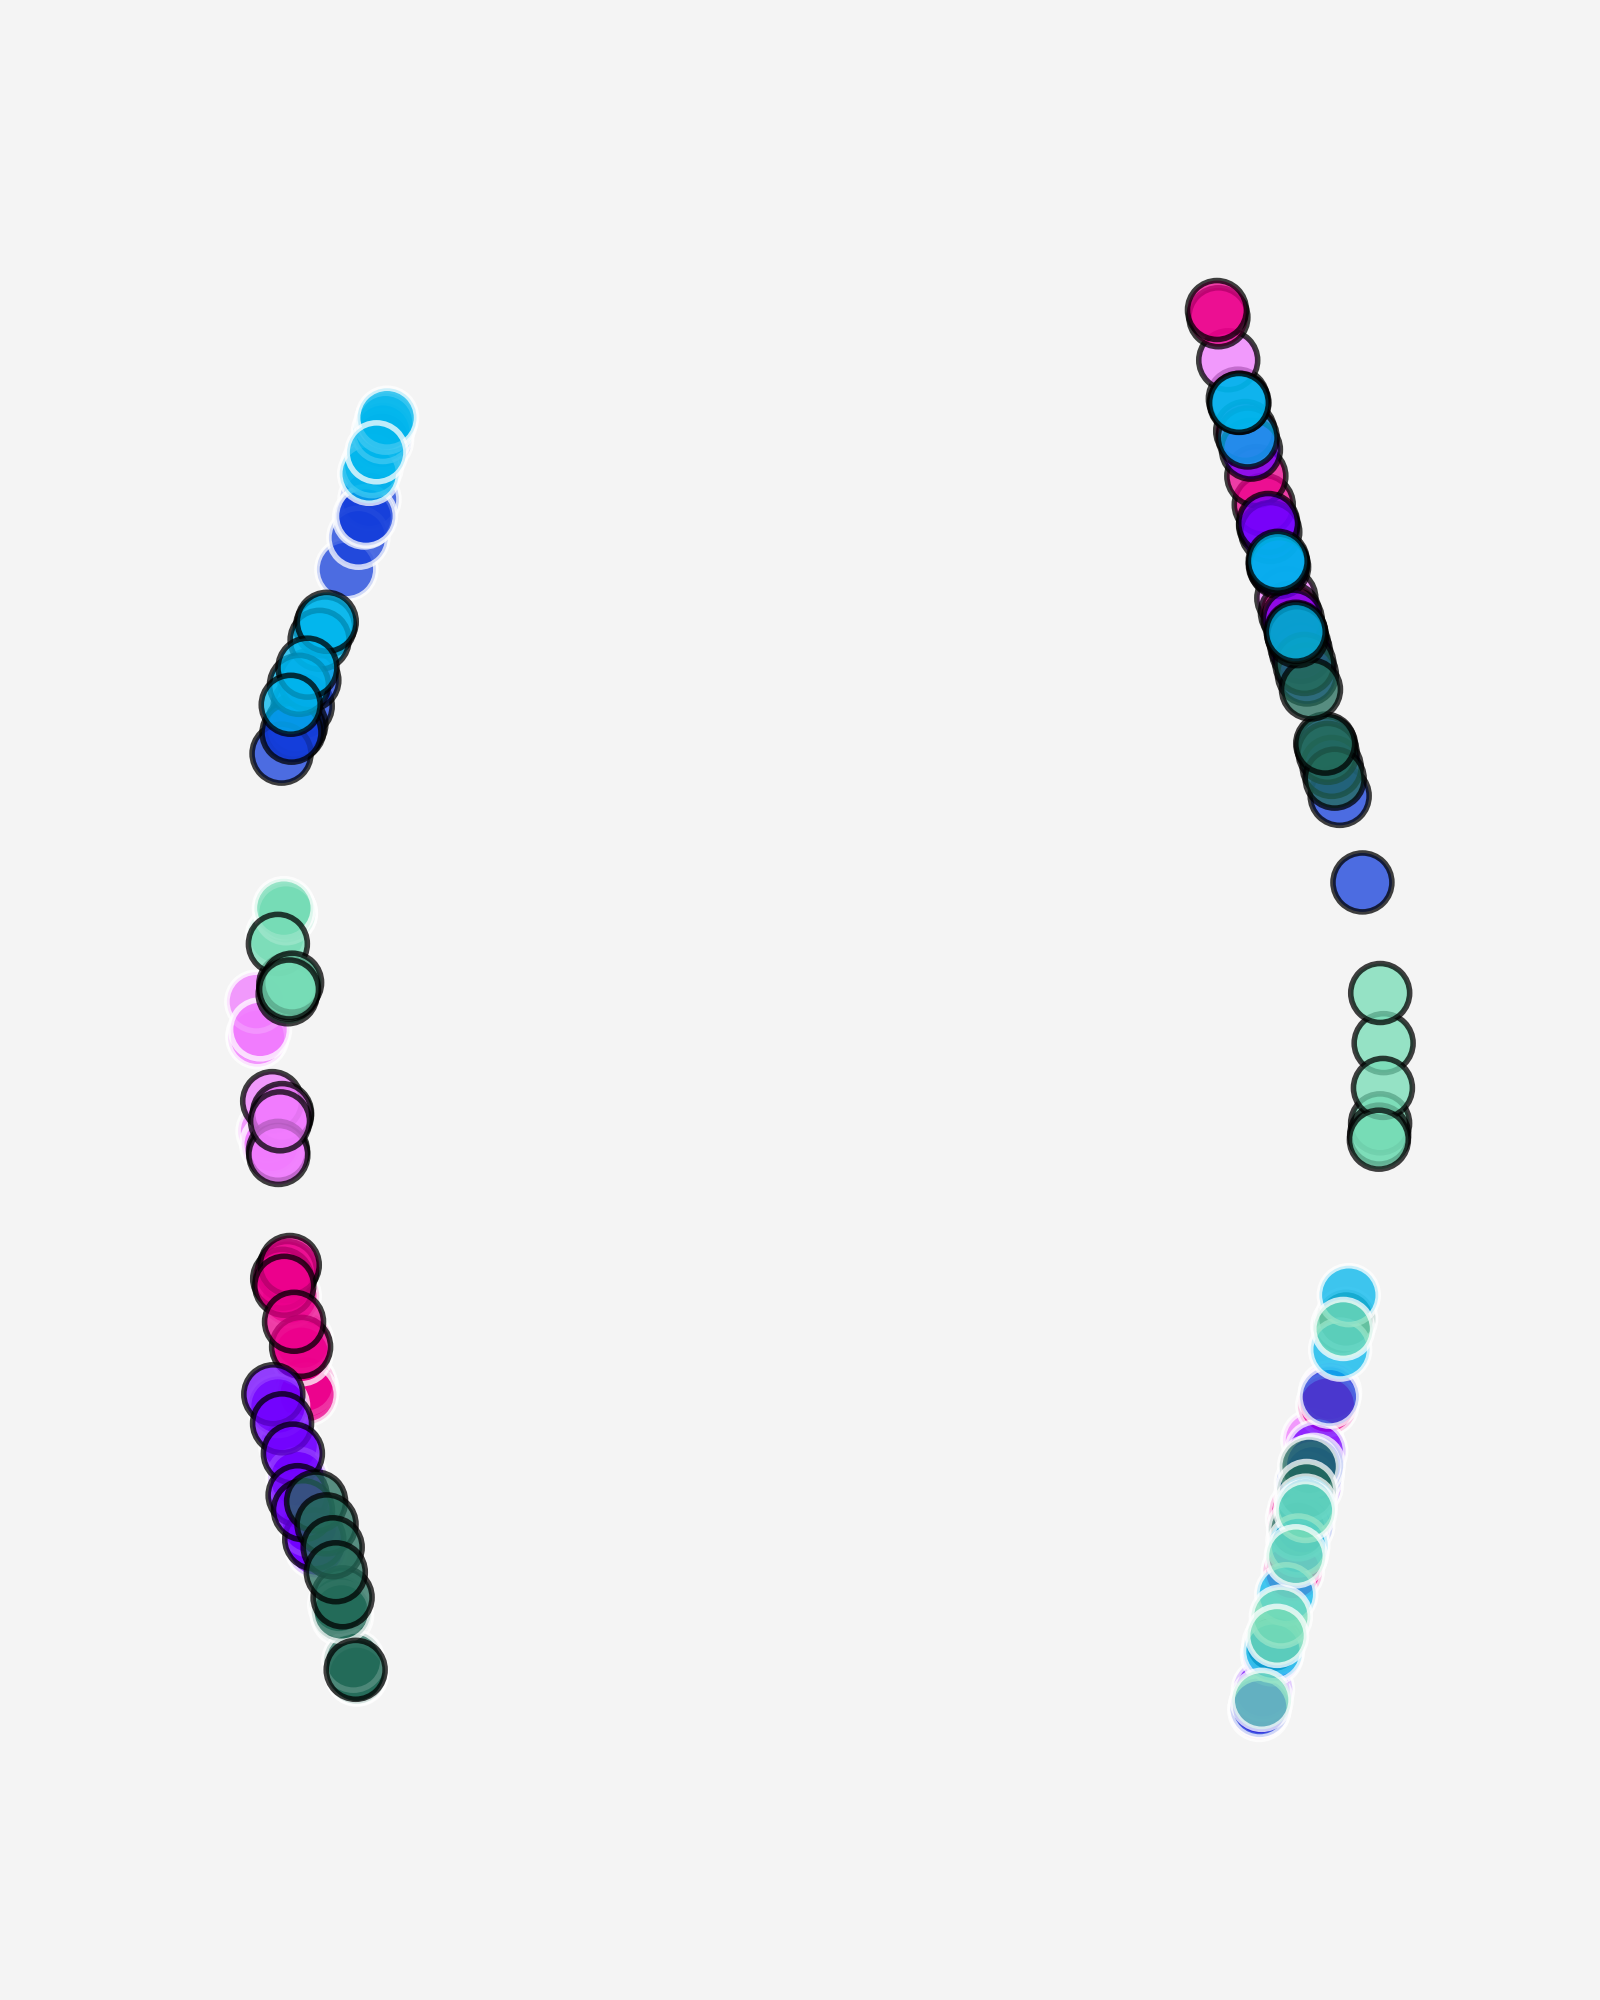

In [34]:
import matplotlib
x=data_phate.iloc[:,0]
y=data_phate.iloc[:,1]

fig, ax = plt.subplots(1, figsize=(8,10))
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)


donor = {'7':'#F17BFF', 'A':'#EC008C', 'B':'#7100FF', 'C':'#143EDB', 'D':'#236B59', 
             'E':'#00B6ED','F':'#76DCB6', 'X':'#000000'}    

culture = {'PDOgd':'#000000', 'gd':'White'}

plt.scatter(x, y,s=450,alpha=0.75, c=emd_df['Donor'].map(donor), edgecolors=emd_df['Culture'].map(culture), linewidths=2)
plt.axis('off')
plt.show()

In [35]:
#Single-Cell Density Plots
raw_data = data_as_meta
raw_data

,pHH3,RFP,Anti-mCherry,Vimentin,B7C23,EpCAM,B7C18,PanCK,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44,Date,PDO,Culture,Donor,Transduction,Treatment,Replicate,Time,Batch,Cell_type,Condition,Control
0,0.000000,0.000000,0.000000,2.635808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.172187,5.242671,2.236802,1.311062,2.191995,2.551486,2.945614,0.003697,1.617355,1.182826,1.534643,2.291442,2.658897,6.140974,2.523861,0.0,1.637384,1.884223,3.068760,0.0,1.017096,2.198082,4.567261,3.553432,1.006270,0.724190,0.0,0.942287,2.665155,1.331301,0.794049,2.464090,0.968516,1.229753,2.170845,0.000000,20220614,27,gd,7,eGFP-stIL15,B7C18,A,48,1,gd,gd_7_eGFP-stIL15_B7C18_20220614_A,gd_7_NT_BM
1,0.000000,0.189732,0.000000,1.763776,0.000000,0.000000,0.000000,0.134350,0.000000,0.000000,0.000000,1.745306,4.777012,1.924034,1.655560,0.612201,1.678370,2.360501,0.000000,2.239278,0.000000,1.733113,0.389523,2.286372,5.759048,1.374954,0.0,1.144053,1.079957,2.392179,0.0,0.022002,0.542177,4.498133,3.173383,1.573502,2.051740,0.0,1.161904,1.135531,0.000000,0.000000,2.011436,0.000000,0.947666,1.108421,0.000000,20220614,27,gd,7,eGFP-stIL15,B7C18,A,48,1,gd,gd_7_eGFP-stIL15_B7C18_20220614_A,gd_7_NT_BM
2,0.000000,0.000000,0.000000,5.219335,0.327724,0.086938,0.000000,0.953784,0.297170,0.592500,0.000000,1.551023,3.705901,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.058084,0.000000,0.000000,0.312602,0.878766,4.460401,0.546531,0.0,0.000000,1.516960,0.974883,0.0,0.886886,1.651314,4.036290,2.122890,0.000000,0.000000,0.0,0.054325,1.711265,1.135752,0.000000,2.375292,0.537091,1.088137,1.333599,0.417291,20220614,27,gd,7,eGFP-stIL15,B7C18,A,48,1,gd,gd_7_eGFP-stIL15_B7C18_20220614_A,gd_7_NT_BM
3,0.000000,0.003614,0.591720,2.195040,0.253940,0.000000,0.000000,0.000000,0.161834,0.087513,0.000000,2.038133,4.385191,1.232441,0.939388,2.259835,1.208863,1.982400,0.662776,2.110894,0.000000,1.403642,0.908180,0.000000,5.541471,1.102346,0.0,2.635815,0.625883,0.738850,0.0,0.000000,1.639368,4.176577,2.019670,0.000000,0.000000,0.0,1.567202,2.014352,0.000000,0.793840,2.013983,0.000000,1.292040,0.645034,0.780979,20220614,27,gd,7,eGFP-stIL15,B7C18,A,48,1,gd,gd_7_eGFP-stIL15_B7C18_20220614_A,gd_7_NT_BM
4,0.000000,0.000000,0.000000,2.245956,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050238,0.524775,3.490256,0.000000,0.000000,0.000000,1.290724,1.511196,0.672633,2.106909,0.000000,0.213741,3.314286,2.165978,4.770334,1.713956,0.0,0.678151,0.878362,1.900784,0.0,0.000000,0.267438,3.779421,1.514089,0.000000,1.133004,0.0,0.000000,0.757334,0.000000,1.619628,1.500521,0.000000,0.000000,0.367121,0.036680,20220614,27,gd,7,eGFP-stIL15,B7C18,A,48,1,gd,gd_7_eGFP-stIL15_B7C18_20220614_A,gd_7_NT_BM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284138,0.120747,0.000000,0.000000,1.726836,0.000000,0.000000,0.000000,0.701131,0.000000,0.000000,0.000000,1.212100,3.094021,0.000000,1.094072,1.693429,1.185940,0.809241,0.318914,1.659372,0.219540,0.000000,3.058195,0.000000,4.062861,1.025755,0.0,0.264430,0.059100,0.724401,0.0,1.695184,0.560924,3.327094,1.344709,0.000000,1.489398,0.0,0.300263,1.646955,0.126441,0.000000,1.044156,0.048836,0.910232,0.000000,0.000000,20220614,27,PDOgd,F,NT,BM,C,48,2,gd,PDOgd_F_NT_BM_20220614_C,gd_F_NT_BM
1284139,0.000000,0.784939,0.741120,0.976925,0.599755,1.852972,0.717729,0.947632,0.535568,0.434492,0.119530,2.487009,4.365041,1.318201,0.000000,0.000000,1.904528,0.501814,0.000000,0.236786,0.923264,0.000000,1.280052,0.000000,5.143532,0.391007,0.0,0.289510,0.803807,1.632327,0.0,0.000000,1.051954,1.865091,1.926523,0.000000,0.000000,0.0,0.173858,2.285836,0.367934,0.080830

In [36]:
NTC_BM = raw_data.loc[(raw_data['Culture'] == 'gd') & (raw_data['Donor'] == 'C') & (raw_data['Transduction'] == 'NT') & (raw_data['Treatment'] == 'BM')].sample(n=7000, random_state=13, replace=True)

TrC_BM = raw_data.loc[(raw_data['Culture'] == 'gd') & (raw_data['Donor'] == 'C') & (raw_data['Transduction'] == 'eGFP-stIL15') & (raw_data['Treatment'] == 'BM')].sample(n=7000, random_state=13, replace=True)

NTC_PDO_BM = raw_data.loc[(raw_data['Culture'] == 'PDOgd') & (raw_data['Donor'] == 'C') & (raw_data['Transduction'] == 'NT') & (raw_data['Treatment'] == 'BM')].sample(n=7000, random_state=13, replace=True)

TrC_PDO_BM = raw_data.loc[(raw_data['Culture'] == 'PDOgd') & (raw_data['Donor'] == 'C') & (raw_data['Transduction'] == 'eGFP-stIL15') & (raw_data['Treatment'] == 'BM')].sample(n=7000, random_state=13, replace=True)

In [37]:
C_all = pd.concat([NTC_BM, NTC_PDO_BM, TrC_BM, TrC_PDO_BM])
C_all

,pHH3,RFP,Anti-mCherry,Vimentin,B7C23,EpCAM,B7C18,PanCK,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44,Date,PDO,Culture,Donor,Transduction,Treatment,Replicate,Time,Batch,Cell_type,Condition,Control
310844,0.000000,0.000000,0.000000,0.535983,0.299893,0.000000,0.000000,1.003183,0.000000,0.000000,0.000000,2.186700,4.124910,1.407115,0.802625,1.584379,1.860945,1.701389,0.000000,2.208065,0.364868,1.309812,1.149180,0.000000,5.279065,2.471799,0.172440,0.363293,0.989634,1.961452,0.000000,0.219524,1.800592,4.065486,2.786431,0.545893,0.814592,0.000000,0.903279,2.570405,1.123925,1.872075,2.463616,0.897537,0.000000,0.661489,0.303977,20220614,27,gd,C,NT,BM,A,48,2,gd,gd_C_NT_BM_20220614_A,gd_C_NT_BM
312730,0.000000,0.000000,0.000000,0.043790,0.000000,0.000000,0.000000,1.606473,0.000000,0.000000,0.000000,1.547810,1.701692,1.440859,1.067080,0.964662,0.516624,1.542176,0.616856,1.239906,0.404867,0.277594,0.000000,0.000000,4.761102,1.542883,0.244864,0.011674,1.004571,0.987414,0.000000,0.698639,0.647007,3.138876,2.088896,0.816962,1.280541,0.000000,0.210885,2.332153,0.000000,0.095904,0.849325,0.359241,0.010485,0.000000,0.000000,20220614,27,gd,C,NT,BM,C,48,2,gd,gd_C_NT_BM_20220614_C,gd_C_NT_BM
310580,0.000000,0.000000,0.000000,0.096795,0.394076,0.603068,0.000000,0.000000,0.409537,0.000000,0.000000,1.302783,3.475369,1.271647,0.000000,1.276848,0.477752,1.559202,0.078512,1.045467,0.722967,0.420711,0.000000,0.189562,4.793600,0.664142,0.000000,0.565259,0.000000,1.243638,0.000000,0.819875,0.654504,3.503983,2.398536,0.000000,1.089771,0.267020,0.000000,1.547041,0.000000,0.029999,1.830861,0.828480,0.000000,0.000000,0.098068,20220614,27,gd,C,NT,BM,A,48,2,gd,gd_C_NT_BM_20220614_A,gd_C_NT_BM
311372,0.000000,0.349723,0.000000,0.653064,0.000000,0.000000,0.000000,0.210910,0.000000,0.000000,0.000000,1.928421,2.683388,0.084244,0.181112,0.000000,1.145539,0.577172,0.000000,0.519602,0.737869,0.268200,1.174675,0.000000,3.943102,0.785222,0.000000,0.000000,0.000000,1.373007,0.000000,1.712758,0.000000,2.203858,2.881680,0.000000,0.181738,0.000000,0.000000,1.486299,0.000000,0.000000,1.959665,0.246034,0.667756,0.105826,0.000000,20220614,27,gd,C,NT,BM,A,48,2,gd,gd_C_NT_BM_20220614_A,gd_C_NT_BM
312286,0.255201,0.000000,0.280642,1.262176,0.000000,0.000000,0.165555,0.000000,0.000000,0.000000,0.000000,0.583587,3.793393,0.010696,1.152597,1.261288,1.336522,2.186607,0.000000,1.689919,1.013209,0.000000,0.000000,0.494455,4.838425,1.121958,0.659770,0.144467,0.919010,1.209630,0.000000,0.276025,1.233075,3.830160,1.787738,0.000000,0.521904,0.000000,0.619001,2.245099,0.000000,0.000000,1.313722,0.000000,0.547118,0.000000,0.000000,20220614,27,gd,C,NT,BM,C,48,2,gd,gd_C_NT_BM_20220614_C,gd_C_NT_BM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932504,0.000000,0.000000,0.872913,2.479155,0.000000,0.000000,1.180627,0.627579,1.936299,5.416631,0.000000,1.785743,4.128165,0.848617,1.553273,1.560546,1.220762,1.969399,0.616412,2.697076,0.689188,1.912868,0.097043,0.320560,5.366137,2.181666,0.938450,0.744721,0.827972,2.417942,0.000000,1.809014,0.637224,4.585453,2.982431,0.000000,1.433691,0.000000,1.526724,1.992960,1.367066,1.820293,2.727661,1.362990,1.245608,0.405248,1.783988,20220614,27,PDOgd,C,eGFP-stIL15,BM,A,48,1,gd,PDOgd_C_eGFP-stIL15_BM_20220614_A,gd_C_NT_BM
969610,0.000000,0.000000,0.000000,2.798336,0.000000,0.000000,0.108549,0.000000,0.703609,0.000000,0.216658,1.225563,3.554403,1.331822,0.995832,0.000000,1.855063,1.512522,0.000000,2.773871,0.000000,0.969164,2.802036,2.135963,4.854119,2.312749,0.275891,0.000000,0.735497,1.754769,0.000000,0.242886,0.675763,4.009800,2.126437,0.639368,1.243580,0.000000,1.414563,

In [39]:
C_all_meta = C_all[['Date','PDO','Culture','Donor','Transduction','Treatment','Replicate','Time','Batch','Cell_type']]
C_all_meta

,Date,PDO,Culture,Donor,Transduction,Treatment,Replicate,Time,Batch,Cell_type
310844,20220614,27,gd,C,NT,BM,A,48,2,gd
312730,20220614,27,gd,C,NT,BM,C,48,2,gd
310580,20220614,27,gd,C,NT,BM,A,48,2,gd
311372,20220614,27,gd,C,NT,BM,A,48,2,gd
312286,20220614,27,gd,C,NT,BM,C,48,2,gd
...,...,...,...,...,...,...,...,...,...,...
932504,20220614,27,PDOgd,C,eGFP-stIL15,BM,A,48,1,gd
969610,20220614,27,PDOgd,C,eGFP-stIL15,BM,B,48,1,gd
979933,20220614,27,PDOgd,C,eGFP-stIL15,BM,C,48,1,gd
938421,20220614,27,PDOgd,C,eGFP-stIL15,BM,A,48,1,gd


In [41]:
final_C_all = C_all.drop([

 'RFP',
 'Anti-mCherry',
 'Vimentin',
 'B7C23',
 'EpCAM',
 'B7C18',
 'PanCK',
 'GFP',
'Date',
'PDO',
'Culture',
'Donor',
'Transduction',
'Treatment',
'Replicate',
'Time',
'Cell_type',
'Batch',
'Condition',
'Control'
    ],axis=1, inplace=False)
final_C_all

,pHH3,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44
310844,0.000000,0.000000,0.000000,2.186700,4.124910,1.407115,0.802625,1.584379,1.860945,1.701389,0.000000,2.208065,0.364868,1.309812,1.149180,0.000000,5.279065,2.471799,0.172440,0.363293,0.989634,1.961452,0.000000,0.219524,1.800592,4.065486,2.786431,0.545893,0.814592,0.000000,0.903279,2.570405,1.123925,1.872075,2.463616,0.897537,0.000000,0.661489,0.303977
312730,0.000000,0.000000,0.000000,1.547810,1.701692,1.440859,1.067080,0.964662,0.516624,1.542176,0.616856,1.239906,0.404867,0.277594,0.000000,0.000000,4.761102,1.542883,0.244864,0.011674,1.004571,0.987414,0.000000,0.698639,0.647007,3.138876,2.088896,0.816962,1.280541,0.000000,0.210885,2.332153,0.000000,0.095904,0.849325,0.359241,0.010485,0.000000,0.000000
310580,0.000000,0.000000,0.000000,1.302783,3.475369,1.271647,0.000000,1.276848,0.477752,1.559202,0.078512,1.045467,0.722967,0.420711,0.000000,0.189562,4.793600,0.664142,0.000000,0.565259,0.000000,1.243638,0.000000,0.819875,0.654504,3.503983,2.398536,0.000000,1.089771,0.267020,0.000000,1.547041,0.000000,0.029999,1.830861,0.828480,0.000000,0.000000,0.098068
311372,0.000000,0.000000,0.000000,1.928421,2.683388,0.084244,0.181112,0.000000,1.145539,0.577172,0.000000,0.519602,0.737869,0.268200,1.174675,0.000000,3.943102,0.785222,0.000000,0.000000,0.000000,1.373007,0.000000,1.712758,0.000000,2.203858,2.881680,0.000000,0.181738,0.000000,0.000000,1.486299,0.000000,0.000000,1.959665,0.246034,0.667756,0.105826,0.000000
312286,0.255201,0.000000,0.000000,0.583587,3.793393,0.010696,1.152597,1.261288,1.336522,2.186607,0.000000,1.689919,1.013209,0.000000,0.000000,0.494455,4.838425,1.121958,0.659770,0.144467,0.919010,1.209630,0.000000,0.276025,1.233075,3.830160,1.787738,0.000000,0.521904,0.000000,0.619001,2.245099,0.000000,0.000000,1.313722,0.000000,0.547118,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932504,0.000000,5.416631,0.000000,1.785743,4.128165,0.848617,1.553273,1.560546,1.220762,1.969399,0.616412,2.697076,0.689188,1.912868,0.097043,0.320560,5.366137,2.181666,0.938450,0.744721,0.827972,2.417942,0.000000,1.809014,0.637224,4.585453,2.982431,0.000000,1.433691,0.000000,1.526724,1.992960,1.367066,1.820293,2.727661,1.362990,1.245608,0.405248,1.783988
969610,0.000000,0.000000,0.216658,1.225563,3.554403,1.331822,0.995832,0.000000,1.855063,1.512522,0.000000,2.773871,0.000000,0.969164,2.802036,2.135963,4.854119,2.312749,0.275891,0.000000,0.735497,1.754769,0.000000,0.242886,0.675763,4.009800,2.126437,0.639368,1.243580,0.000000,1.414563,1.216345,0.183247,1.792689,2.984296,0.947254,1.276392,0.000000,0.250189
979933,0.000000,0.593219,0.254863,1.781931,3.654983,0.784901,1.026073,1.361118,1.477067,1.993846,0.000000,1.435086,0.000000,0.446420,1.215627,0.081151,4.847721,2.704859,1.764444,0.000000,0.000000,2.151187,0.000000,0.640423,0.091700,4.408553,2.727245,0.000000,2.009753,0.000000,1.247047,1.597164,0.159610,1.174030,2.857526,1.484182,0.865549,1.406452,0.000000
938421,0.000000,0.000000,0.000000,1.813265,4.219241,0.254654,1.293914,1.970334,1.350434,1.469687,0.517242,2.666368,0.645703,1.605472,2.480658,1.234442,5.433929,2.593077,0.424014,1.129885,1.142948,2.370585,0.781612,1.262379,0.902475,4.558357,3.398171,0.157912,1.424368,0.000000,1.643019,1.210752,1.706476,0.000000,2.620049,0.543379,0.617133,0.000000,0.893964


Calculating PHATE...
  Running PHATE on 28000 observations and 39 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 12.11 seconds.
    Calculating affinities...


/Users/callumnattress/opt/anaconda3/envs/phate_trellis/lib/python3.10/site-packages/graphtools/graphs.py:290: RuntimeWarning: Detected zero distance between 16801 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(


    Calculated affinities in 0.74 seconds.


/Users/callumnattress/opt/anaconda3/envs/phate_trellis/lib/python3.10/site-packages/graphtools/graphs.py:454: RuntimeWarning: overflow encountered in power
  K.data = np.exp(-1 * np.power(K.data, self.decay))


  Calculated graph and diffusion operator in 12.88 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.96 seconds.
    Calculating KMeans...
    Calculated KMeans in 2.88 seconds.
  Calculated landmark operator in 4.41 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.52 seconds.
  Calculating metric MDS...


/Users/callumnattress/opt/anaconda3/envs/phate_trellis/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


  Calculated metric MDS in 11.74 seconds.
Calculated PHATE in 29.56 seconds.


/Users/callumnattress/opt/anaconda3/envs/phate_trellis/lib/python3.10/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<AxesSubplot:title={'center':'test'}, xlabel='PHATE1', ylabel='PHATE2'>

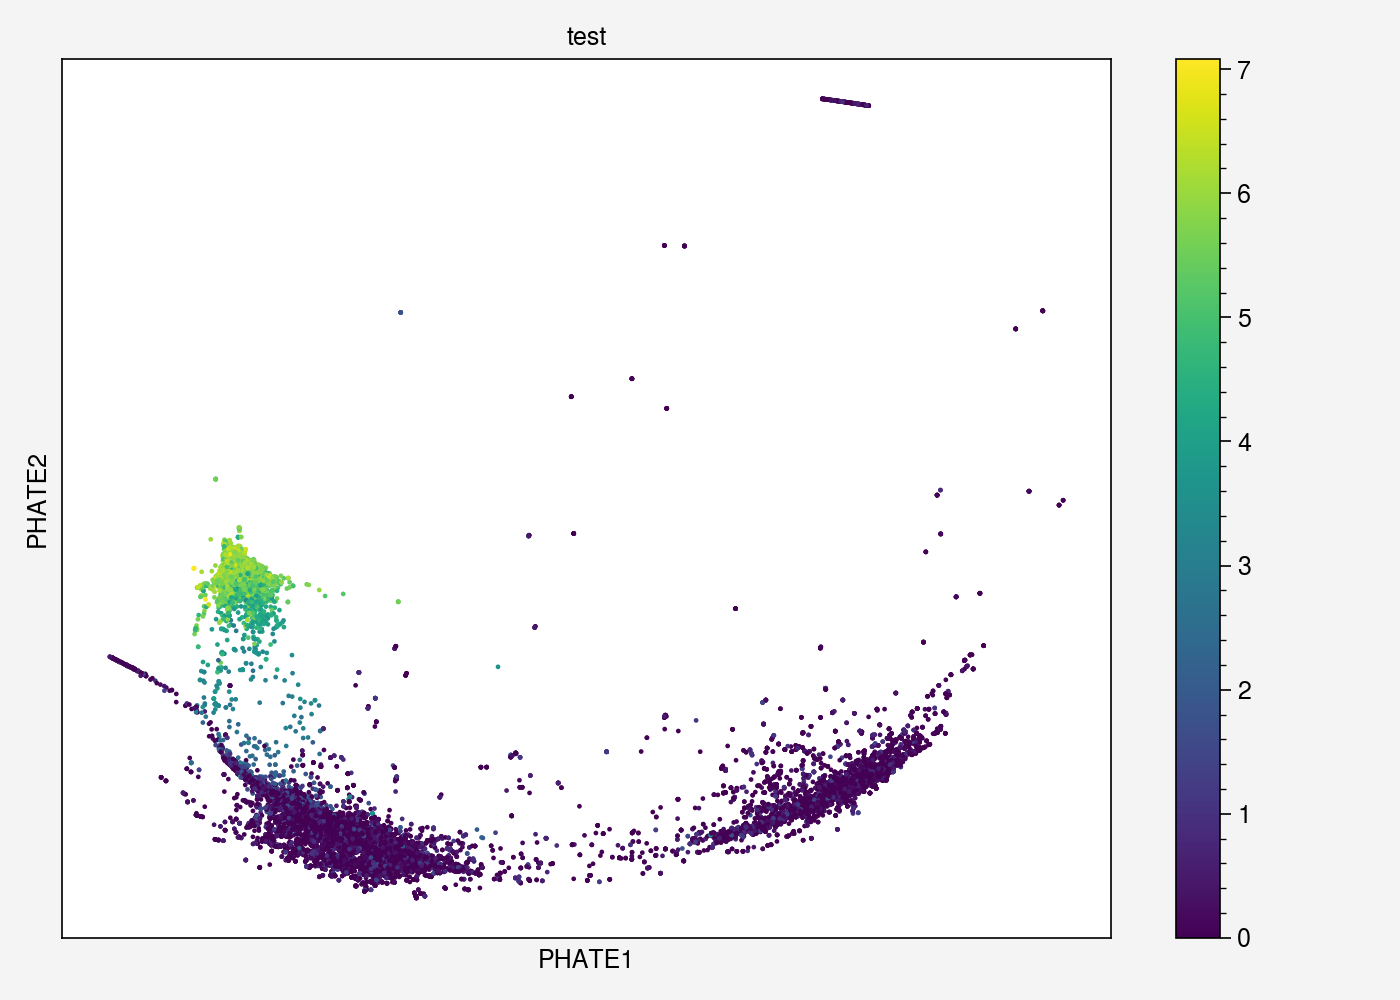

In [42]:
#E_all
phate_op = phate.PHATE(knn=5, t=33,
    random_state=13, mds_solver="smacof", verbose=True)

phate_C_all = phate_op.fit_transform(final_C_all)
phate_C_all = pd.DataFrame(phate_C_all, index=final_C_all.index)


scprep.plot.scatter2d(phate_C_all, c=C_all['IdU'], cmap='viridis',
                      ticks=False, label_prefix='PHATE',
                      legend_anchor=(1,1), figsize=(7,5), title='test')


/Users/callumnattress/opt/anaconda3/envs/phate_trellis/lib/python3.10/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<AxesSubplot:title={'center':'test'}, xlabel='PHATE1', ylabel='PHATE2'>

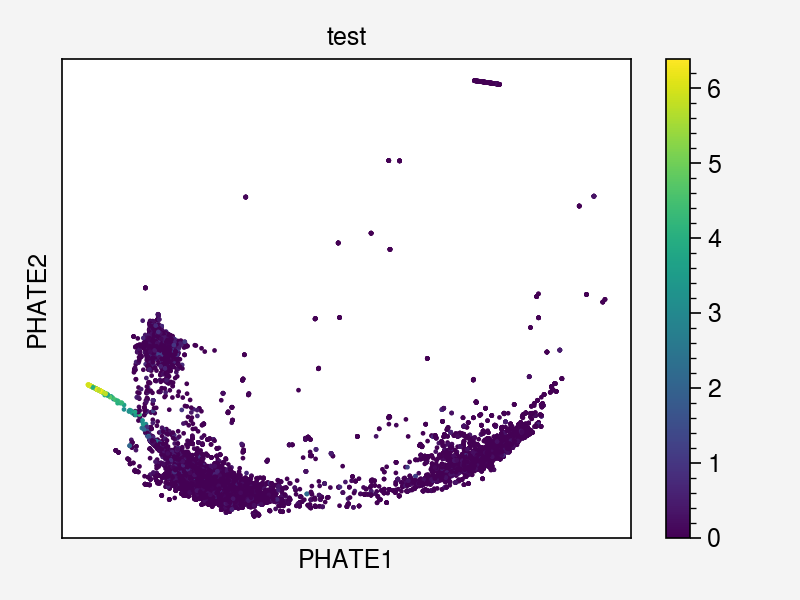

In [ ]:
#M-Phase
scprep.plot.scatter2d(phate_C_all, c=C_all['pHH3'], cmap='viridis',
                      ticks=False, label_prefix='PHATE',
                      legend_anchor=(1,1), figsize=(4,3), title='test')

/Users/callumnattress/opt/anaconda3/envs/phate_trellis/lib/python3.10/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<AxesSubplot:title={'center':'test'}, xlabel='PHATE1', ylabel='PHATE2'>

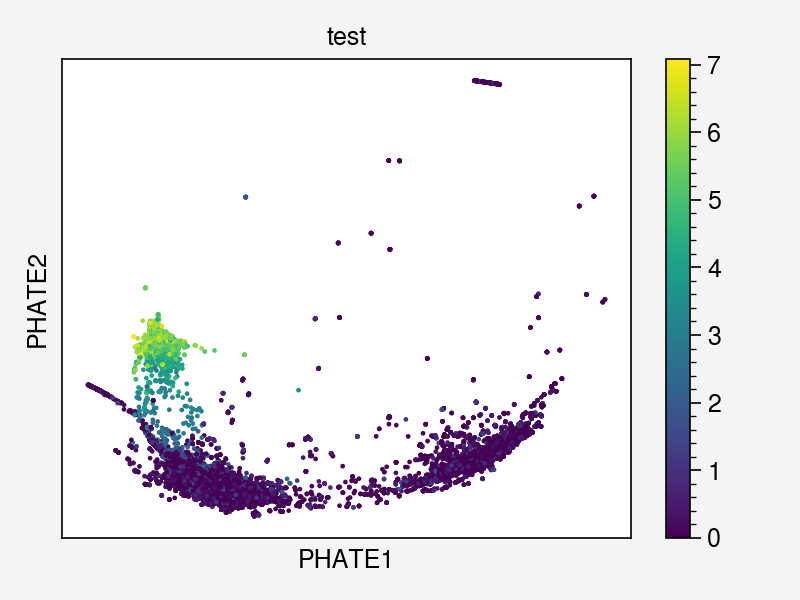

In [45]:
#S-Phase
scprep.plot.scatter2d(phate_C_all, c=C_all['IdU'], cmap='viridis',
                      ticks=False, label_prefix='PHATE',
                      legend_anchor=(1,1), figsize=(4,3), title='test')

/Users/callumnattress/opt/anaconda3/envs/phate_trellis/lib/python3.10/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<AxesSubplot:title={'center':'test'}, xlabel='PHATE1', ylabel='PHATE2'>

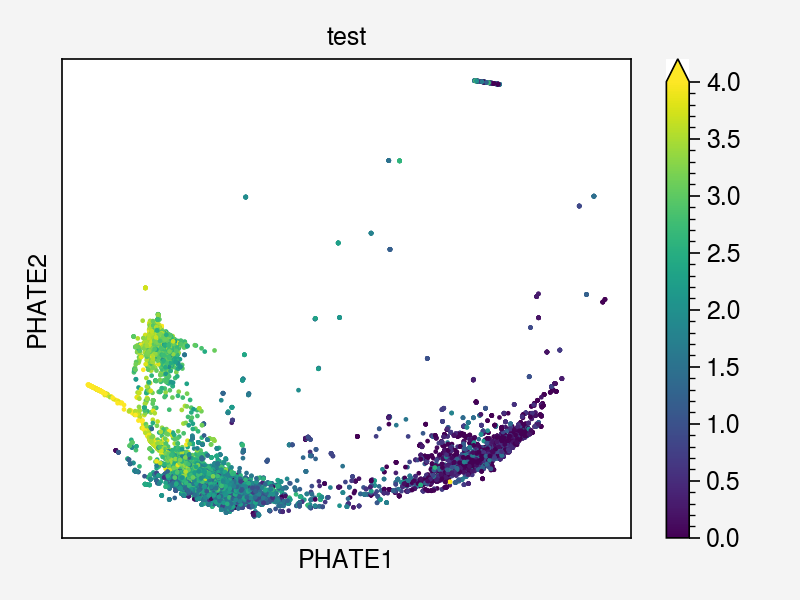

In [48]:
#Proliferating
scprep.plot.scatter2d(phate_C_all, c=C_all['pRB'], cmap='viridis',
                      ticks=False, label_prefix='PHATE',
                      legend_anchor=(1,1), figsize=(4,3), title='test',vmax=4)

In [54]:
phate_meta_all = pd.concat([phate_C_all, C_all_meta], axis=1)
phate_meta_all

,0,1,Date,PDO,Culture,Donor,Transduction,Treatment,Replicate,Time,Batch,Cell_type
310844,-0.011007,-0.005662,20220614,27,gd,C,NT,BM,A,48,2,gd
312730,-0.006651,-0.012184,20220614,27,gd,C,NT,BM,C,48,2,gd
310580,-0.005638,-0.010731,20220614,27,gd,C,NT,BM,A,48,2,gd
311372,0.018764,-0.001851,20220614,27,gd,C,NT,BM,A,48,2,gd
312286,-0.005025,-0.012567,20220614,27,gd,C,NT,BM,C,48,2,gd
...,...,...,...,...,...,...,...,...,...,...,...,...
932504,-0.014892,0.023322,20220614,27,PDOgd,C,eGFP-stIL15,BM,A,48,1,gd
969610,-0.010883,-0.007058,20220614,27,PDOgd,C,eGFP-stIL15,BM,B,48,1,gd
979933,-0.010521,-0.006546,20220614,27,PDOgd,C,eGFP-stIL15,BM,C,48,1,gd
938421,-0.011339,-0.005081,20220614,27,PDOgd,C,eGFP-stIL15,BM,A,48,1,gd


In [55]:
phate_meta_all

,0,1,Date,PDO,Culture,Donor,Transduction,Treatment,Replicate,Time,Batch,Cell_type
310844,-0.011007,-0.005662,20220614,27,gd,C,NT,BM,A,48,2,gd
312730,-0.006651,-0.012184,20220614,27,gd,C,NT,BM,C,48,2,gd
310580,-0.005638,-0.010731,20220614,27,gd,C,NT,BM,A,48,2,gd
311372,0.018764,-0.001851,20220614,27,gd,C,NT,BM,A,48,2,gd
312286,-0.005025,-0.012567,20220614,27,gd,C,NT,BM,C,48,2,gd
...,...,...,...,...,...,...,...,...,...,...,...,...
932504,-0.014892,0.023322,20220614,27,PDOgd,C,eGFP-stIL15,BM,A,48,1,gd
969610,-0.010883,-0.007058,20220614,27,PDOgd,C,eGFP-stIL15,BM,B,48,1,gd
979933,-0.010521,-0.006546,20220614,27,PDOgd,C,eGFP-stIL15,BM,C,48,1,gd
938421,-0.011339,-0.005081,20220614,27,PDOgd,C,eGFP-stIL15,BM,A,48,1,gd


In [56]:
kde_NTC_BM = phate_meta_all[:7000].drop(['Date', 'PDO', 'Culture', 'Donor','Transduction', 'Treatment', 'Replicate', 'Time', 'Batch', 'Cell_type'],axis=1, inplace=False)
kde_NTC_PDO_BM = phate_meta_all[7000:14000].drop(['Date', 'PDO', 'Culture', 'Donor','Transduction', 'Treatment', 'Replicate', 'Time', 'Batch', 'Cell_type'],axis=1, inplace=False)
kde_TrC_BM = phate_meta_all.iloc[14000:21000].drop(['Date', 'PDO', 'Culture', 'Donor','Transduction', 'Treatment', 'Replicate', 'Time', 'Batch', 'Cell_type'],axis=1, inplace=False)
kde_TrC_PDO_BM = phate_meta_all[-7000:].drop(['Date', 'PDO', 'Culture', 'Donor','Transduction', 'Treatment', 'Replicate', 'Time', 'Batch', 'Cell_type'],axis=1, inplace=False)

In [57]:
kde_TrC_PDO_BM

,0,1
972977,-0.009871,-0.005773
959331,-0.012356,-0.003894
991386,-0.024037,0.013982
951021,-0.014360,-0.001899
962491,-0.015330,0.023845
...,...,...
932504,-0.014892,0.023322
969610,-0.010883,-0.007058
979933,-0.010521,-0.006546
938421,-0.011339,-0.005081


In [58]:
kde_NTE_PDO_BM = phate_meta_all[:10000].drop(['Date', 'PDO', 'Culture', 'Donor','Transduction', 'Treatment', 'Replicate', 'Time', 'Batch', 'Cell_type'],axis=1, inplace=False)
kde_TrE_BM = phate_meta_all.iloc[10000:20000].drop(['Date', 'PDO', 'Culture', 'Donor','Transduction', 'Treatment', 'Replicate', 'Time', 'Batch', 'Cell_type'],axis=1, inplace=False)
kde_TrE_PDO_BM = phate_meta_all[-10000:].drop(['Date', 'PDO', 'Culture', 'Donor','Transduction', 'Treatment', 'Replicate', 'Time', 'Batch', 'Cell_type'],axis=1, inplace=False)

In [59]:
kde_NTE_PDO_BM

,0,1
310844,-0.011007,-0.005662
312730,-0.006651,-0.012184
310580,-0.005638,-0.010731
311372,0.018764,-0.001851
312286,-0.005025,-0.012567
...,...,...
1000492,-0.007875,-0.008257
1001334,0.012898,-0.007507
1001321,0.023924,-0.001694
1000964,-0.005091,0.011986


In [60]:
kde_TrE_BM

,0,1
998983,0.026645,0.001302
1000959,-0.008791,-0.010072
1002175,-0.005381,-0.010081
999861,0.026016,0.000092
1000985,-0.008080,-0.007898
...,...,...
279529,-0.012045,-0.004176
272222,-0.009655,-0.006514
300660,-0.011849,-0.004452
288044,-0.008927,-0.007171


In [61]:
kde_TrE_PDO_BM

,0,1
255365,-0.016266,0.027008
253525,-0.012925,-0.003661
273922,-0.015246,0.024297
250116,-0.012616,-0.004283
265725,-0.015719,0.025656
...,...,...
932504,-0.014892,0.023322
969610,-0.010883,-0.007058
979933,-0.010521,-0.006546
938421,-0.011339,-0.005081


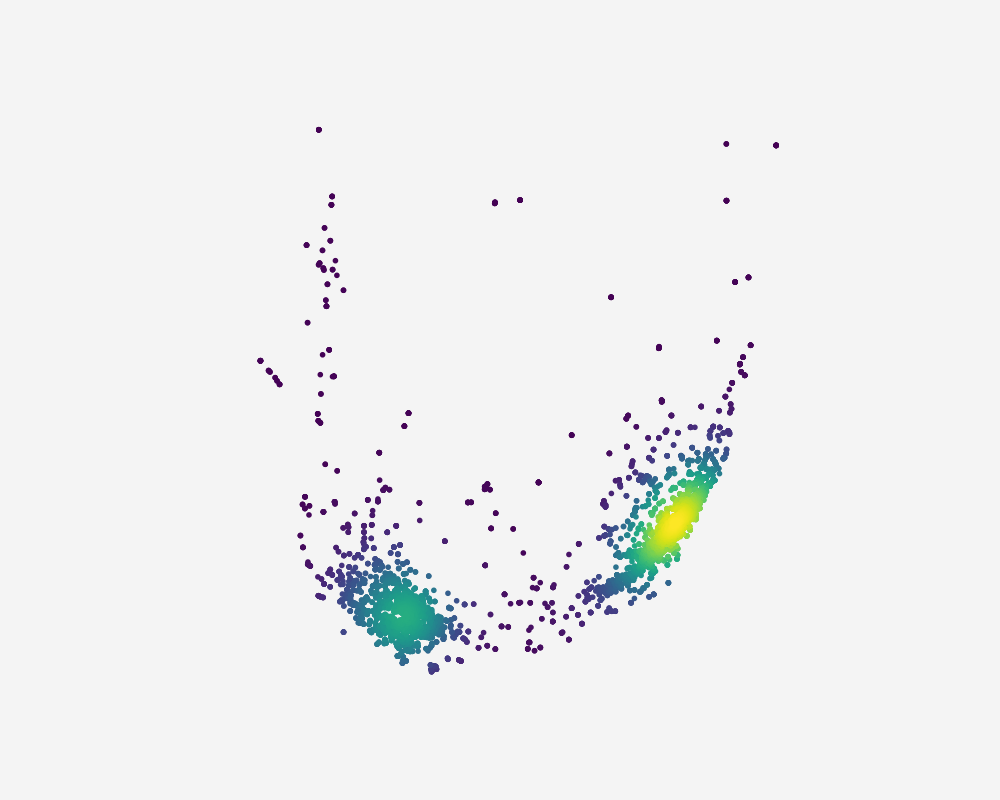

In [ ]:
#Unmodified Donor C Monoculture Untretated (BM)
from scipy.stats import gaussian_kde
import seaborn as sns

data = kde_NTC_BM

x_mono = data.iloc[:,0]
y_mono = data.iloc[:,1]
x_mono_c_array = x_mono.to_numpy()
y_mono_c_array = y_mono.to_numpy()

xy = np.vstack([x_mono_c_array,y_mono_c_array])
z = gaussian_kde(xy)(xy)

idx = z.argsort()
x, y, z = x_mono_c_array[idx], y_mono_c_array[idx], z[idx]

fig, ax = plt.subplots(figsize=(5,4))
cmap = sns.color_palette("viridis", as_cmap=True)
ax.scatter(x, y, c=z, s=2, cmap=cmap)
plt.ylim(-0.02, 0.04)
plt.xlim(-0.04, 0.05)
plt.axis('off')

plt.show()

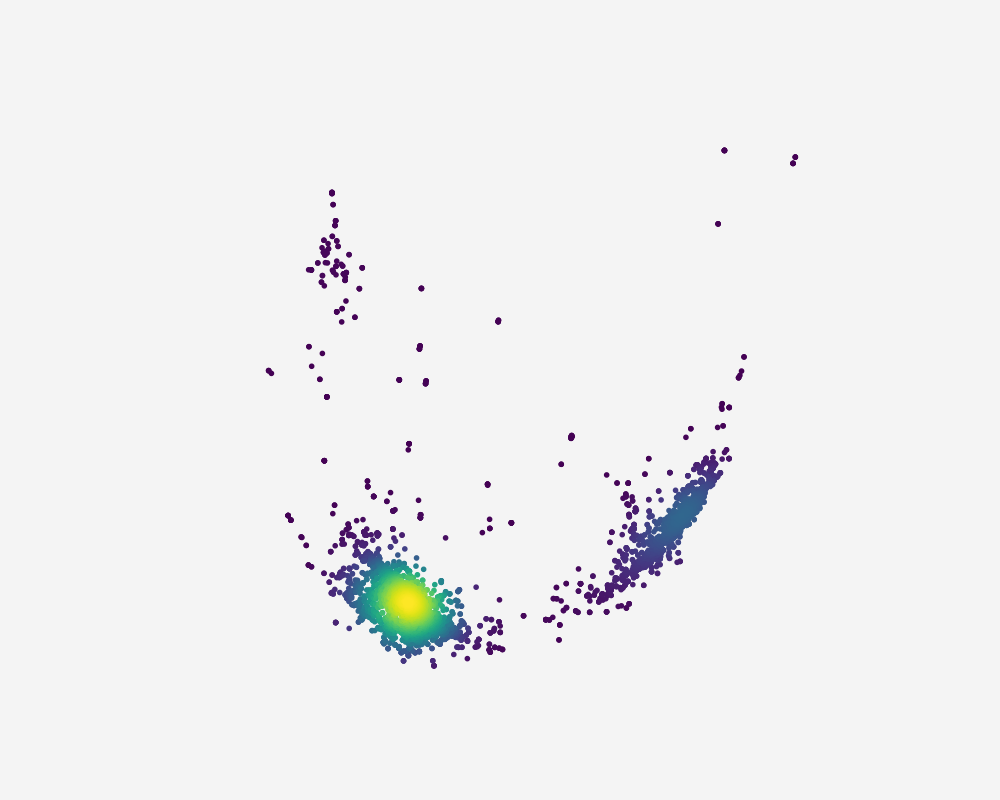

In [ ]:
#Unmodified Donor C Coculture Untretated (BM)
data = kde_NTC_PDO_BM

x_mono = data.iloc[:,0]
y_mono = data.iloc[:,1]
x_mono_c_array = x_mono.to_numpy()
y_mono_c_array = y_mono.to_numpy()

xy = np.vstack([x_mono_c_array,y_mono_c_array])
z = gaussian_kde(xy)(xy)

idx = z.argsort()
x, y, z = x_mono_c_array[idx], y_mono_c_array[idx], z[idx]

fig, ax = plt.subplots(figsize=(5,4))
cmap = sns.color_palette("viridis", as_cmap=True)
ax.scatter(x, y, c=z, s=2, cmap=cmap)
plt.ylim(-0.02, 0.04)
plt.xlim(-0.04, 0.05)
plt.axis('off')
plt.show()


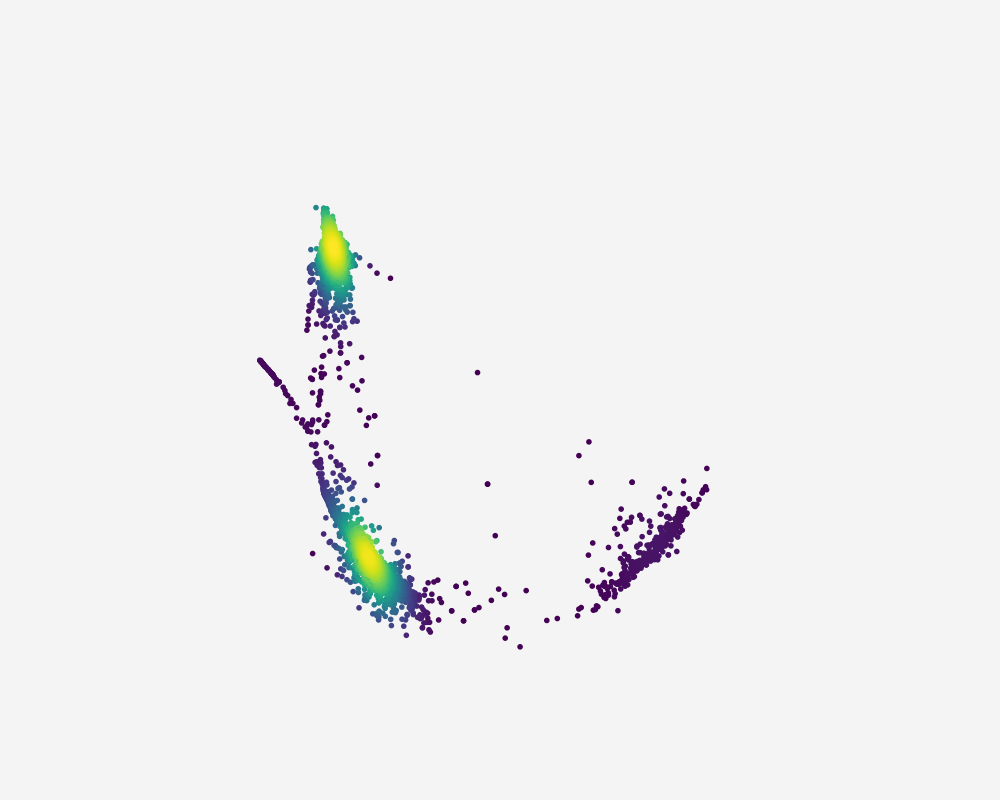

In [ ]:
#stIL15 Donor C Monoculture Untretated (BM)

data = kde_TrC_BM

x_mono = data.iloc[:,0]
y_mono = data.iloc[:,1]
x_mono_c_array = x_mono.to_numpy()
y_mono_c_array = y_mono.to_numpy()

xy = np.vstack([x_mono_c_array,y_mono_c_array])
z = gaussian_kde(xy)(xy)

idx = z.argsort()
x, y, z = x_mono_c_array[idx], y_mono_c_array[idx], z[idx]

fig, ax = plt.subplots(figsize=(5,4))
cmap = sns.color_palette("viridis", as_cmap=True)
ax.scatter(x, y, c=z, s=2, cmap=cmap)
plt.ylim(-0.02, 0.04)
plt.xlim(-0.04, 0.05)
plt.axis('off')
plt.show()

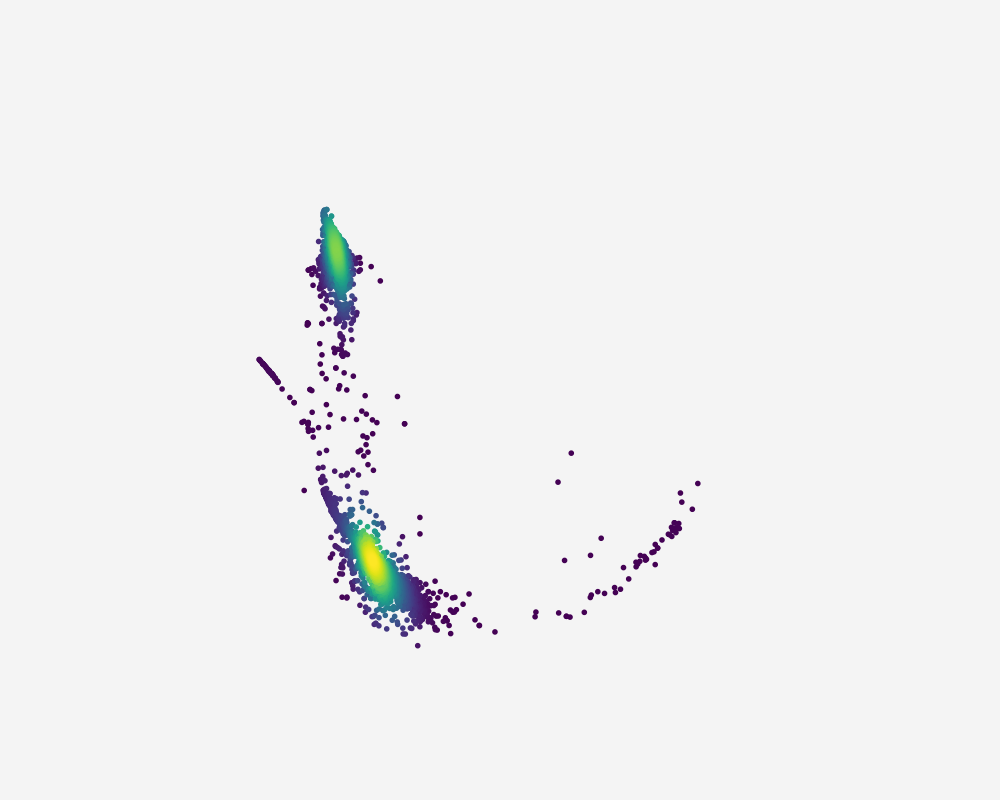

In [ ]:
#stIL15 Donor C Coculture Untretated (BM)

data = kde_TrC_PDO_BM

x_mono = data.iloc[:,0]
y_mono = data.iloc[:,1]
x_mono_c_array = x_mono.to_numpy()
y_mono_c_array = y_mono.to_numpy()

xy = np.vstack([x_mono_c_array,y_mono_c_array])
z = gaussian_kde(xy)(xy)

idx = z.argsort()
x, y, z = x_mono_c_array[idx], y_mono_c_array[idx], z[idx]

fig, ax = plt.subplots(figsize=(5,4))
cmap = sns.color_palette("viridis", as_cmap=True)
ax.scatter(x, y, c=z, s=2, cmap=cmap)
plt.ylim(-0.02, 0.04)
plt.xlim(-0.04, 0.05)
plt.axis('off')
plt.show()